In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

import corrVizHelpers as scH

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [4]:
#%matplotlib inline

In [5]:
writeDir = "write/"

fileName = "GSE207938_ProgressionCohort"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [7]:
inFile = f'data/{fileName}.h5ad'

In [8]:
adata = sc.read_h5ad(inFile)
adata

AnnData object with n_obs × n_vars = 28131 × 16826
    obs: 'batch', 'condition', 'cluster'
    obsm: 'X_EMBED', 'X_PCA'

In [9]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [10]:
adata.obs 

batch condition  cluster
120703424252788_DACD394_Kate_plus  DACD394_Kate_plus        K1        0
120703436605797_DACD394_Kate_plus  DACD394_Kate_plus        K1        1
120703436909853_DACD394_Kate_plus  DACD394_Kate_plus        K1        1
120703454952236_DACD394_Kate_plus  DACD394_Kate_plus        K1        1
120726896892262_DACD394_Kate_plus  DACD394_Kate_plus        K1        5
...                                              ...       ...      ...
241106402626286_DACD550_kate_plus  DACD550_kate_plus        N1        2
241114562127587_DACD550_kate_plus  DACD550_kate_plus        N1        2
241114576730845_DACD550_kate_plus  DACD550_kate_plus        N1        9
241114607893403_DACD550_kate_plus  DACD550_kate_plus        N1        2
241114608163612_DACD550_kate_plus  DACD550_kate_plus        N1        2

[28131 rows x 3 columns]

In [11]:
adata.var

Empty DataFrame
Columns: []
Index: [0610007P14RIK, 0610009B22RIK, 0610009L18RIK, 0610009O20RIK, 0610010F05RIK, 0610010K14RIK, 0610012G03RIK, 0610030E20RIK, 0610033M10RIK, 0610037L13RIK, 0610040J01RIK, 0610043K17RIK, 1010001B22RIK, 1010001N08RIK, 1110002E22RIK, 1110002O04RIK, 1110004E09RIK, 1110004F10RIK, 1110006O24RIK, 1110008F13RIK, 1110008L16RIK, 1110008P14RIK, 1110012L19RIK, 1110017D15RIK, 1110019D14RIK, 1110020A21RIK, 1110028F18RIK, 1110032A03RIK, 1110034G24RIK, 1110036E04RIK, 1110037F02RIK, 1110038F14RIK, 1110051M20RIK, 1110059E24RIK, 1110059G10RIK, 1110065P20RIK, 1190002N15RIK, 1190005I06RIK, 1190007I07RIK, 1200007C13RIK, 1300002E11RIK, 1300017J02RIK, 1500009C09RIK, 1500009L16RIK, 1500011B03RIK, 1500011K16RIK, 1500015L24RIK, 1500015O10RIK, 1500026H17RIK, 1500035N22RIK, 1520401A03RIK, 1600002D24RIK, 1600002H07RIK, 1600002K03RIK, 1600012H06RIK, 1600014C10RIK, 1600014C23RIK, 1600027J07RIK, 1700001C02RIK, 1700001C19RIK, 1700001L05RIK, 1700001L19RIK, 1700001O22RIK, 1700001P01RIK, 1700003E16RIK, 1700003F12RIK, 1700006E09RIK, 1700007B14RIK, 1700007G11RIK, 1700007K13RIK, 1700007L15RIK, 1700008O03RIK, 1700009N14RIK, 1700010I14RIK, 1700011D18RIK, 1700011H14RIK, 1700012B07RIK, 1700012B09RIK, 1700012C14RIK, 1700013F07RIK, 1700015F17RIK, 1700016C15RIK, 1700016D06RIK, 1700016F12RIK, 1700016G22RIK, 1700016H13RIK, 1700016K19RIK, 1700017B05RIK, 1700018A04RIK, 1700019B03RIK, 1700019D03RIK, 1700020D05RIK, 1700020I14RIK, 1700020L24RIK, 1700021F05RIK, 1700022I11RIK, 1700022N22RIK, 1700023F06RIK, 1700024P16RIK, 1700025G04RIK, ...]

[16826 rows x 0 columns]

In [12]:
adata.obs.condition.cat.categories

Index(['K1', 'K1.5', 'K2', 'K3', 'K4', 'K5', 'K6', 'N1', 'N2'], dtype='object')

In [13]:
conditions=["N1","N2"]#,"K1","K1.5","K2"]
adata = adata[[cond in conditions for cond in adata.obs.condition],:]
adata.var_names = [gene[0]+gene[1:].lower() for gene in adata.var_names]
adata

AnnData object with n_obs × n_vars = 5626 × 16826
    obs: 'batch', 'condition', 'cluster'
    obsm: 'X_EMBED', 'X_PCA'

# QC

normalizing counts per cell
    finished (0:00:00)


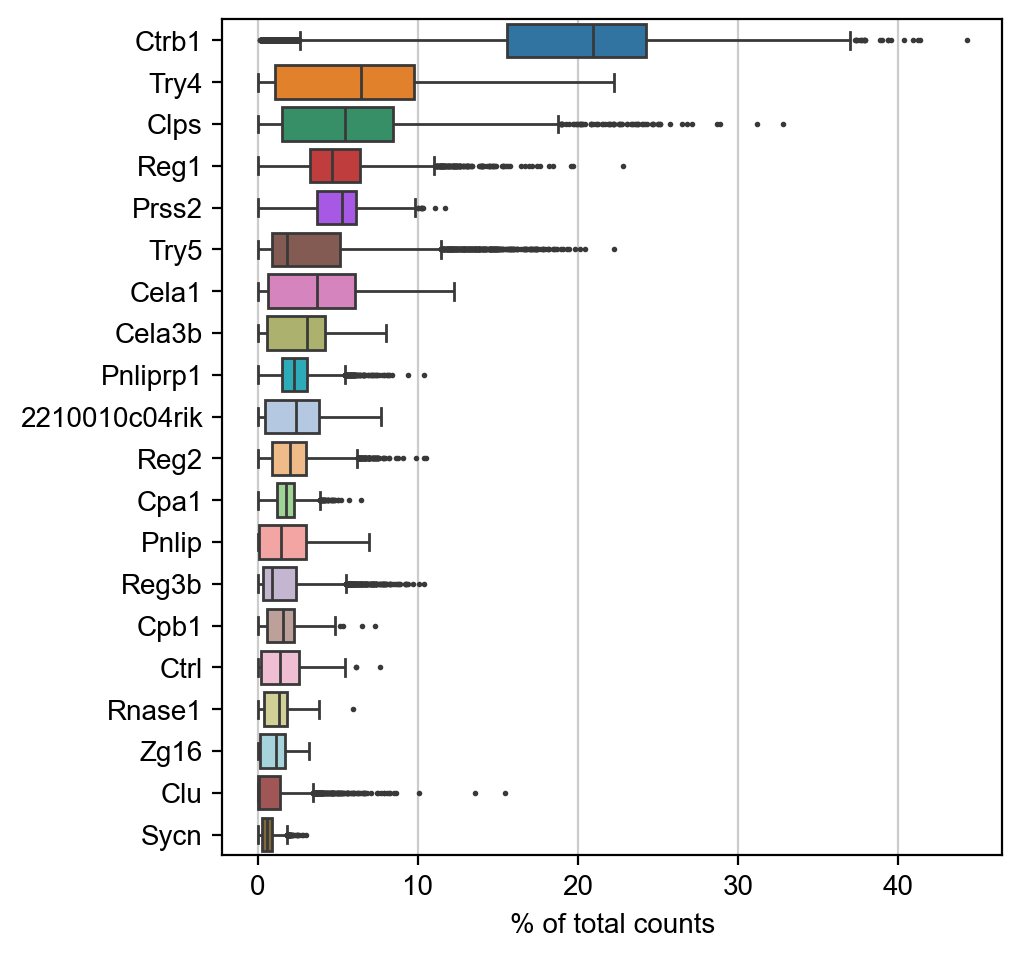

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_4019001/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


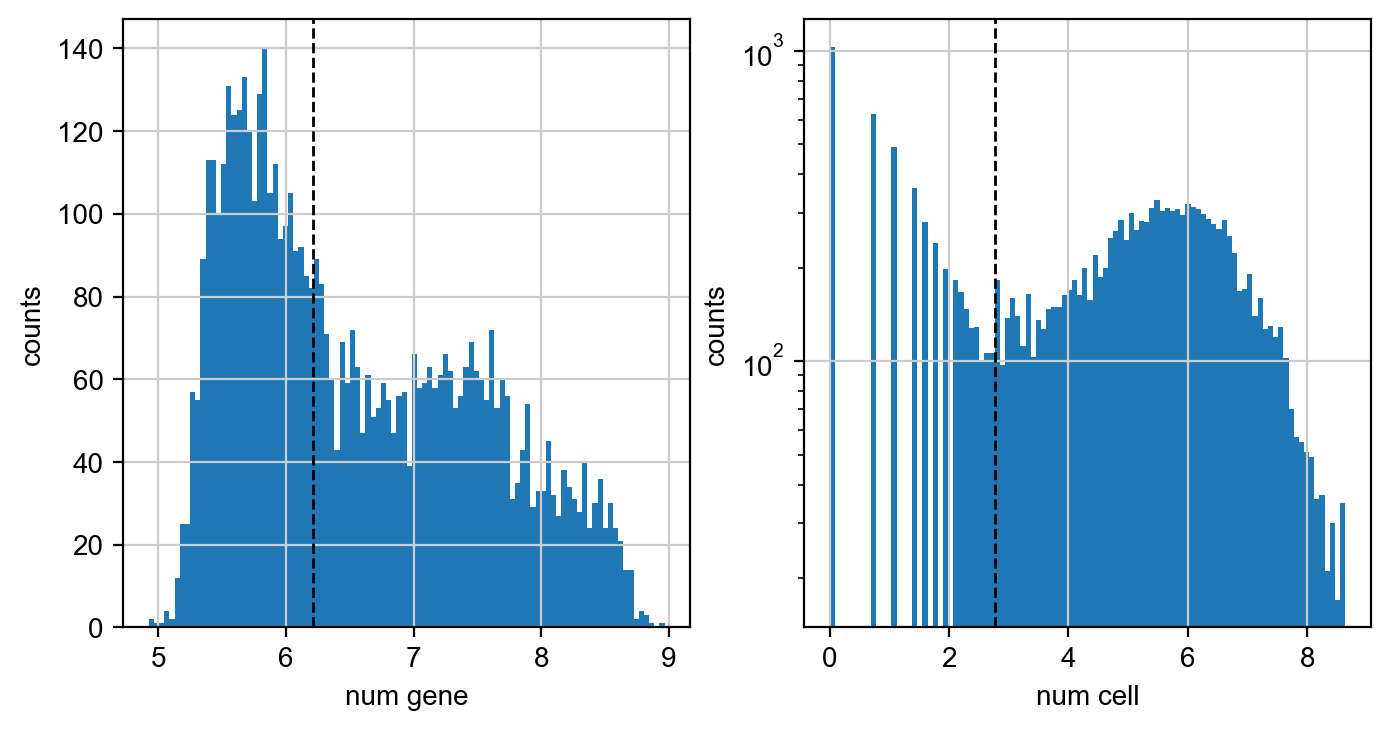

In [15]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [16]:
#sc.pp.filter_cells(adata, min_genes = minGenes)
#sc.pp.filter_genes(adata, min_cells = minCells)

In [17]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [18]:
for g in adata.var_names:
    if "MT-" == g[:2]:
        print(g)

In [19]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_4019001/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


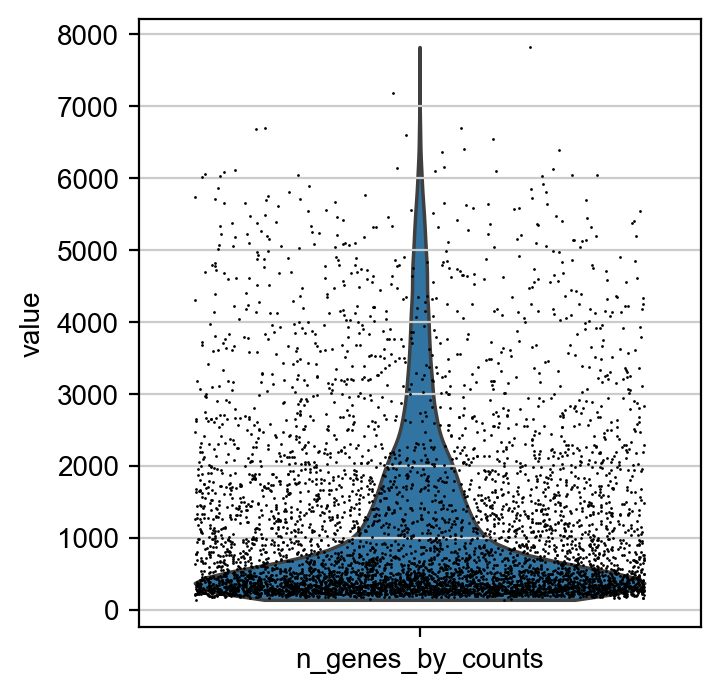

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


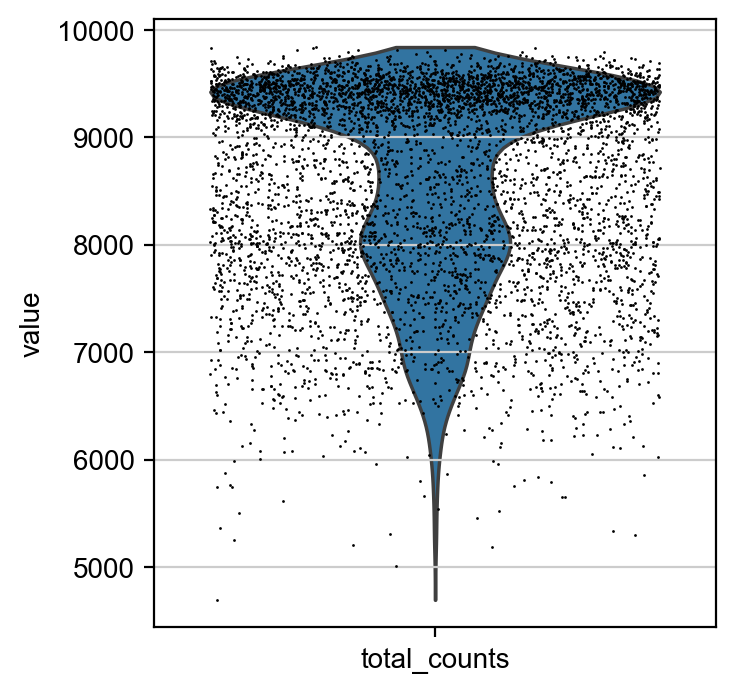

In [21]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


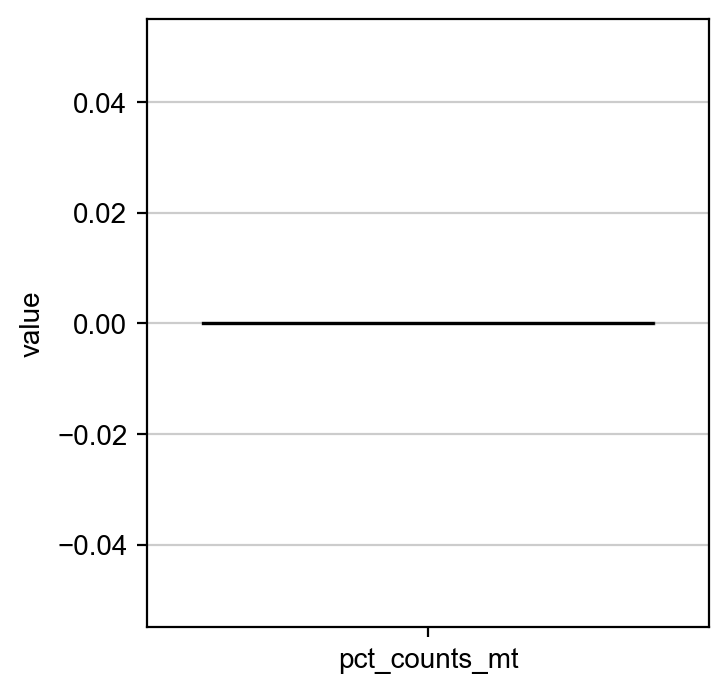

In [22]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

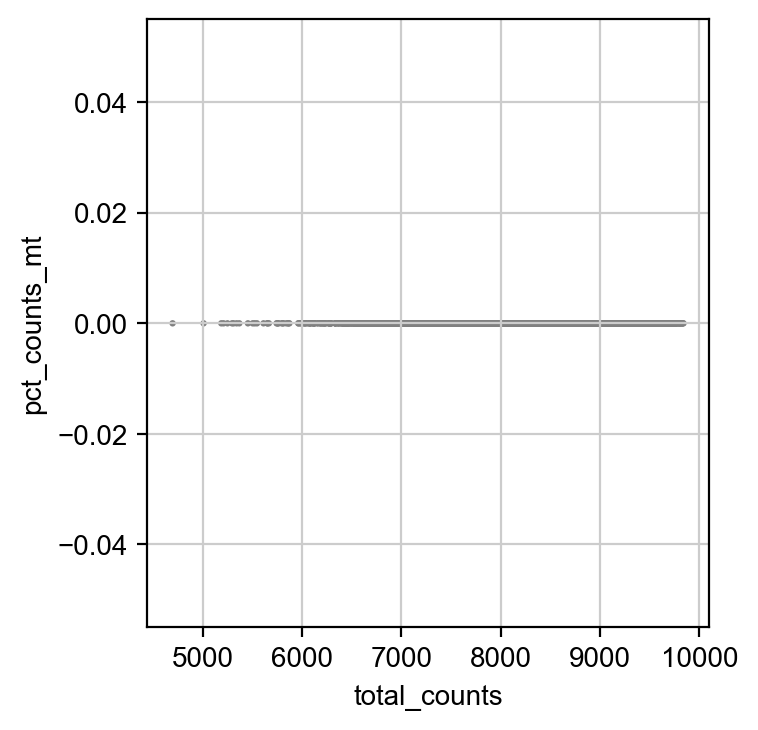

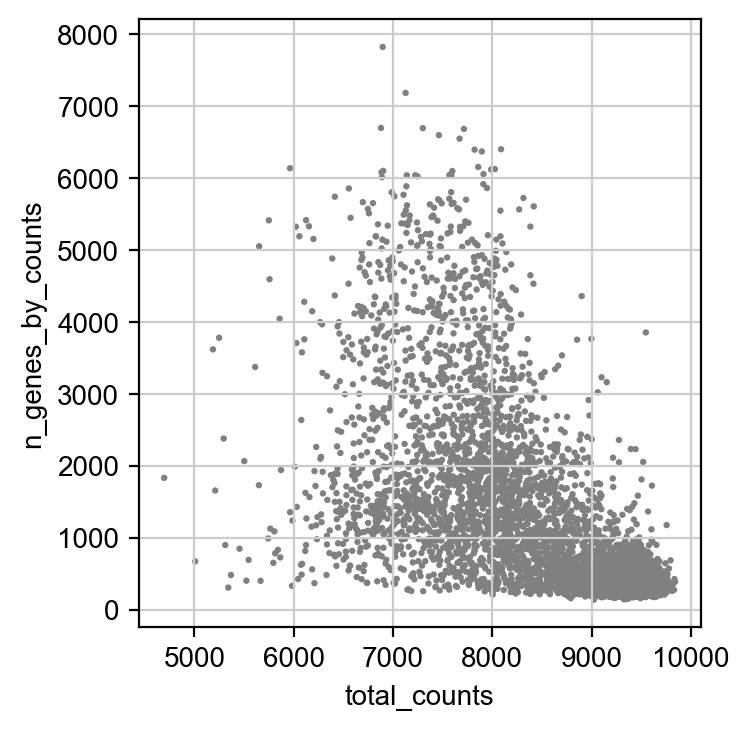

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [24]:
#adata = adata[adata.obs.n_genes_by_counts < 6000, :]
#adata = adata[adata.obs.total_counts < 100000, :]
#adata = adata[adata.obs.pct_counts_mt < 20, :]

save post QC scanpy

In [25]:
adata

AnnData object with n_obs × n_vars = 5626 × 16826
    obs: 'batch', 'condition', 'cluster', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_EMBED', 'X_PCA'

In [26]:
resultsFileQC

'write/GSE207938_ProgressionCohort_QC.h5ad'

In [27]:
adata.write(resultsFileQC)

# Analysis

In [28]:
resultsFile = writeDir + 'Pancreas_Norm_Burdziak.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [29]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [30]:
adata = sc.read(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 5626 × 16826
    obs: 'batch', 'condition', 'cluster', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_EMBED', 'X_PCA'

In [31]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [32]:
sc.pp.log1p(adata)

In [33]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
2242


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


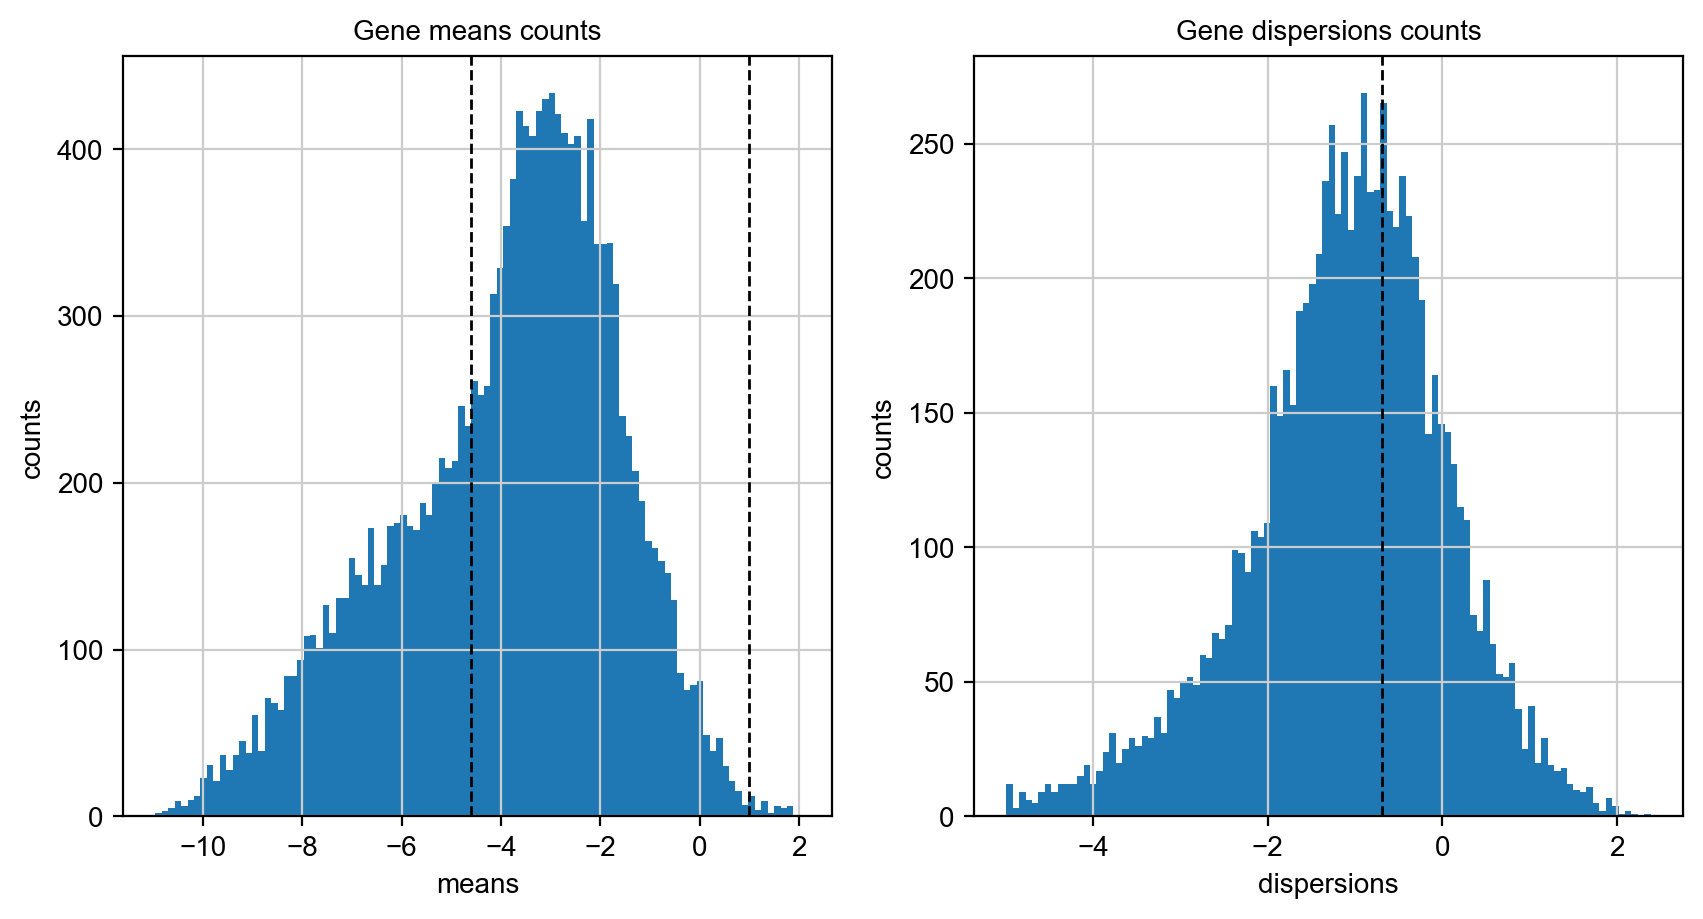

In [34]:
minMean = 0.01
maxMean = 2.7
minDisp = 0.5

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

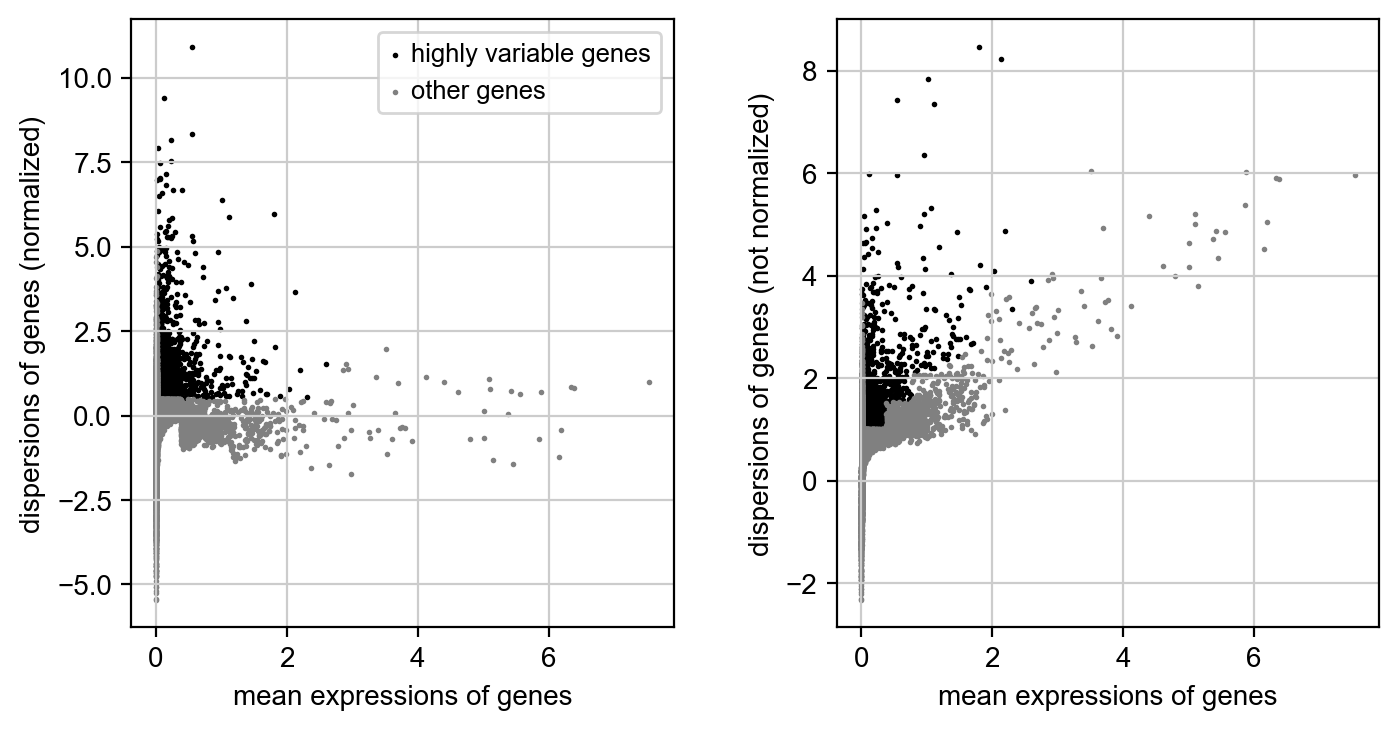

In [35]:
sc.pl.highly_variable_genes(adata)

In [36]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [37]:
adata.raw = adata

In [38]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [39]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [40]:
#sc.pp.scale(adata, max_value=10)

In [41]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


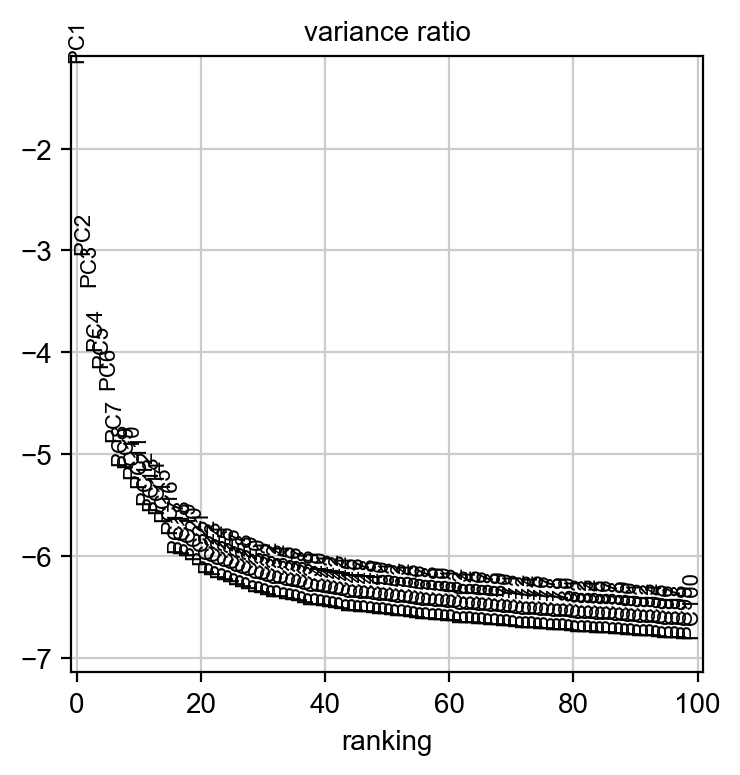

In [42]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

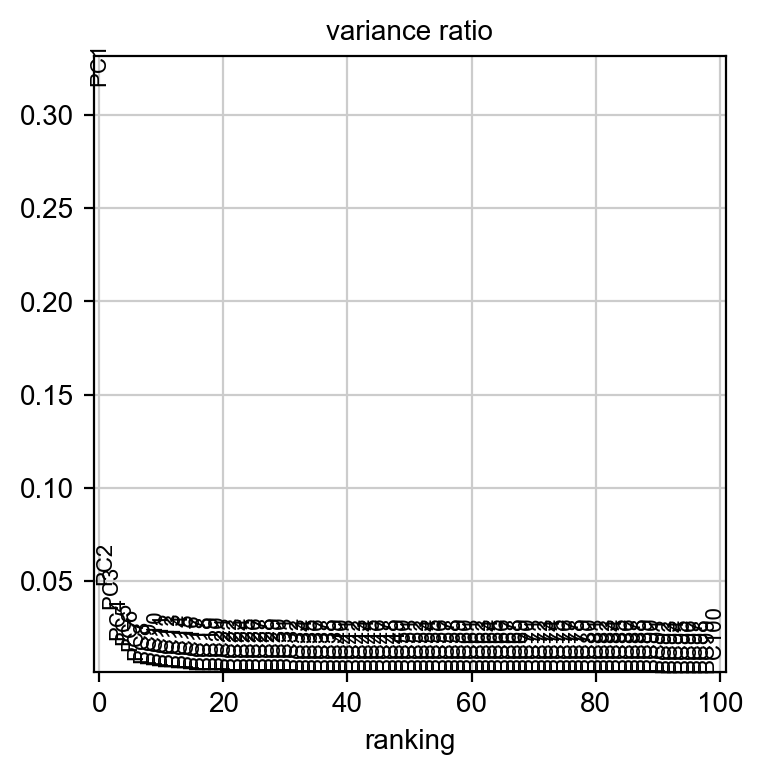

In [43]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [44]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [45]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [46]:
sc.tl.leiden(adata, resolution=0.25)

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [47]:
adata.obs

batch condition  cluster  \
120726911604597_DACD403_Kate_plus  DACD403_Kate_plus        N2        7   
120726924421470_DACD403_Kate_plus  DACD403_Kate_plus        N2       12   
120726943643565_DACD403_Kate_plus  DACD403_Kate_plus        N2        7   
120772949069163_DACD403_Kate_plus  DACD403_Kate_plus        N2       10   
120864470060462_DACD403_Kate_plus  DACD403_Kate_plus        N2        7   
...                                              ...       ...      ...   
241106402626286_DACD550_kate_plus  DACD550_kate_plus        N1        2   
241114562127587_DACD550_kate_plus  DACD550_kate_plus        N1        2   
241114576730845_DACD550_kate_plus  DACD550_kate_plus        N1        9   
241114607893403_DACD550_kate_plus  DACD550_kate_plus        N1        2   
241114608163612_DACD550_kate_plus  DACD550_kate_plus        N1        2   

                                   n_genes_by_counts  total_counts  \
120726911604597_DACD403_Kate_plus                707   7983.316406   
120726924421470_DACD403_Kate_plus               4800   6759.173828   
120726943643565_DACD403_Kate_plus               1615   7037.884766   
120772949069163_DACD403_Kate_plus               4882   8019.616211   
120864470060462_DACD403_Kate_plus                478   7483.943848   
...                                              ...           ...   
241106402626286_DACD550_kate_plus                213   9433.455078   
241114562127587_DACD550_kate_plus                242   9578.851562   
241114576730845_DACD550_kate_plus               2300   8625.611328   
241114607893403_DACD550_kate_plus                289   9314.470703   
241114608163612_DACD550_kate_plus                353   9408.902344   

                                   pct_counts_in_top_50_genes  \
120726911604597_DACD403_Kate_plus                   80.329070   
120726924421470_DACD403_Kate_plus                   32.816644   
120726943643565_DACD403_Kate_plus                   50.025837   
120772949069163_DACD403_Kate_plus                   28.805823   
120864470060462_DACD403_Kate_plus                   88.786691   
...                                                       ...   
241106402626286_DACD550_kate_plus                   94.190846   
241114562127587_DACD550_kate_plus                   94.682979   
241114576730845_DACD550_kate_plus                   68.358289   
241114607893403_DACD550_kate_plus                   94.557244   
241114608163612_DACD550_kate_plus                   94.542693   

                                   pct_counts_in_top_100_genes  \
120726911604597_DACD403_Kate_plus                    84.415632   
120726924421470_DACD403_Kate_plus                    39.997680   
120726943643565_DACD403_Kate_plus                    57.277740   
120772949069163_DACD403_Kate_plus                    36.713536   
120864470060462_DACD403_Kate_plus                    91.652011   
...                                                        ...   
241106402626286_DACD550_kate_plus                    96.291271   
241114562127587_DACD550_kate_plus                    96.370096   
241114576730845_DACD550_kate_plus                    72.860642   
241114607893403_DACD550_kate_plus                    96.339156   
241114608163612_DACD550_kate_plus                    96.339581   

                                   pct_counts_in_top_200_genes  \
120726911604597_DACD403_Kate_plus                    88.942902   
120726924421470_DACD403_Kate_plus                    48.698795   
120726943643565_DACD403_Kate_plus                    65.425160   
120772949069163_DACD403_Kate_plus                    45.680629   
120864470060462_DACD403_Kate_plus                    94.689256   
...                                                        ...   
241106402626286_DACD550_kate_plus                    99.573182   
241114562127587_DACD550_kate_plus                    98.926325   
241114576730845_DACD550_kate_plus                    77.466735   
241114607893403_DACD550_kate_plus                    98.276015   
24111

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

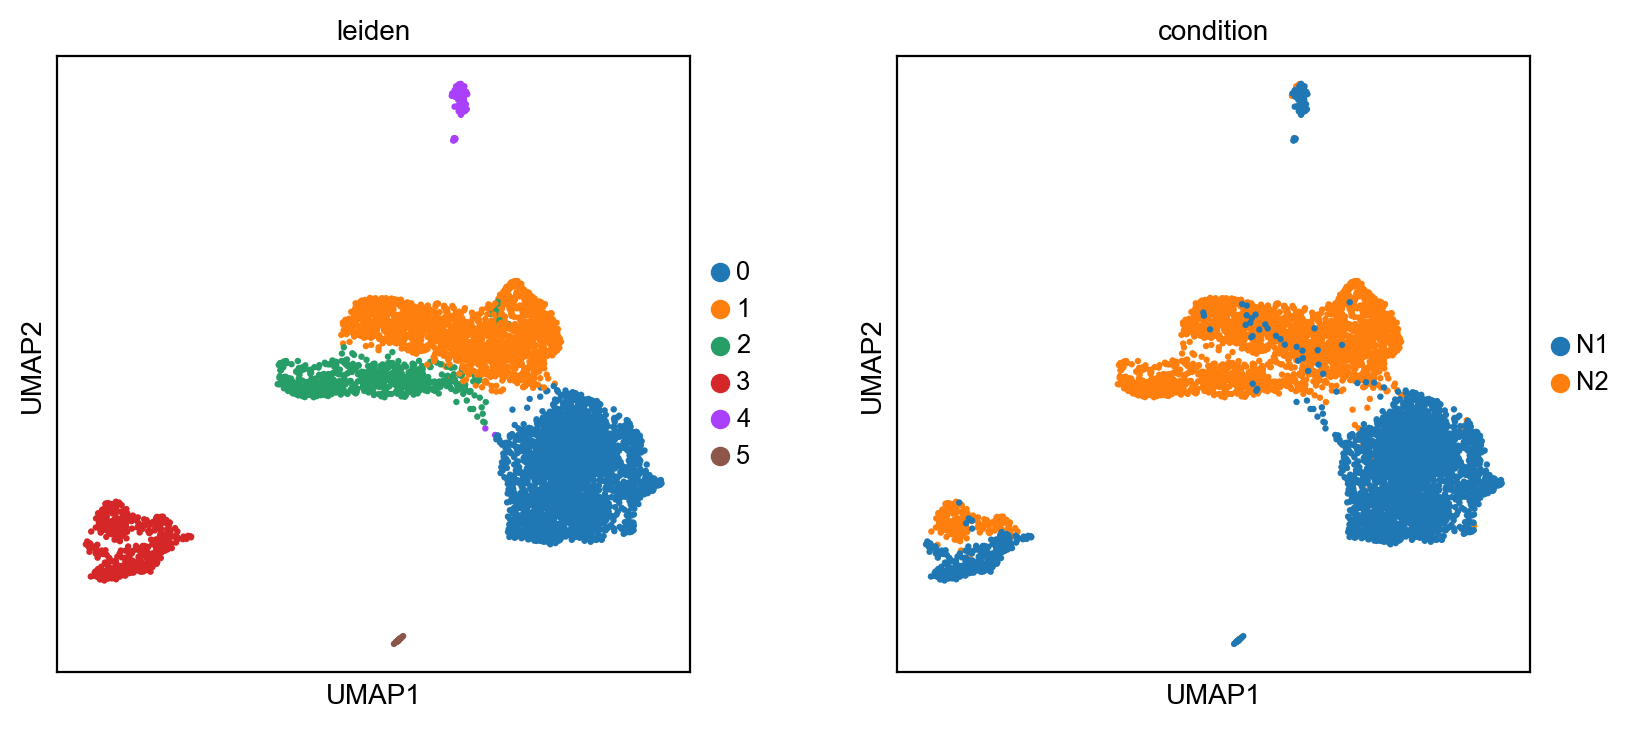

In [48]:
sc.pl.umap(adata, color=["leiden","condition"],ncols=2)

ranking genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


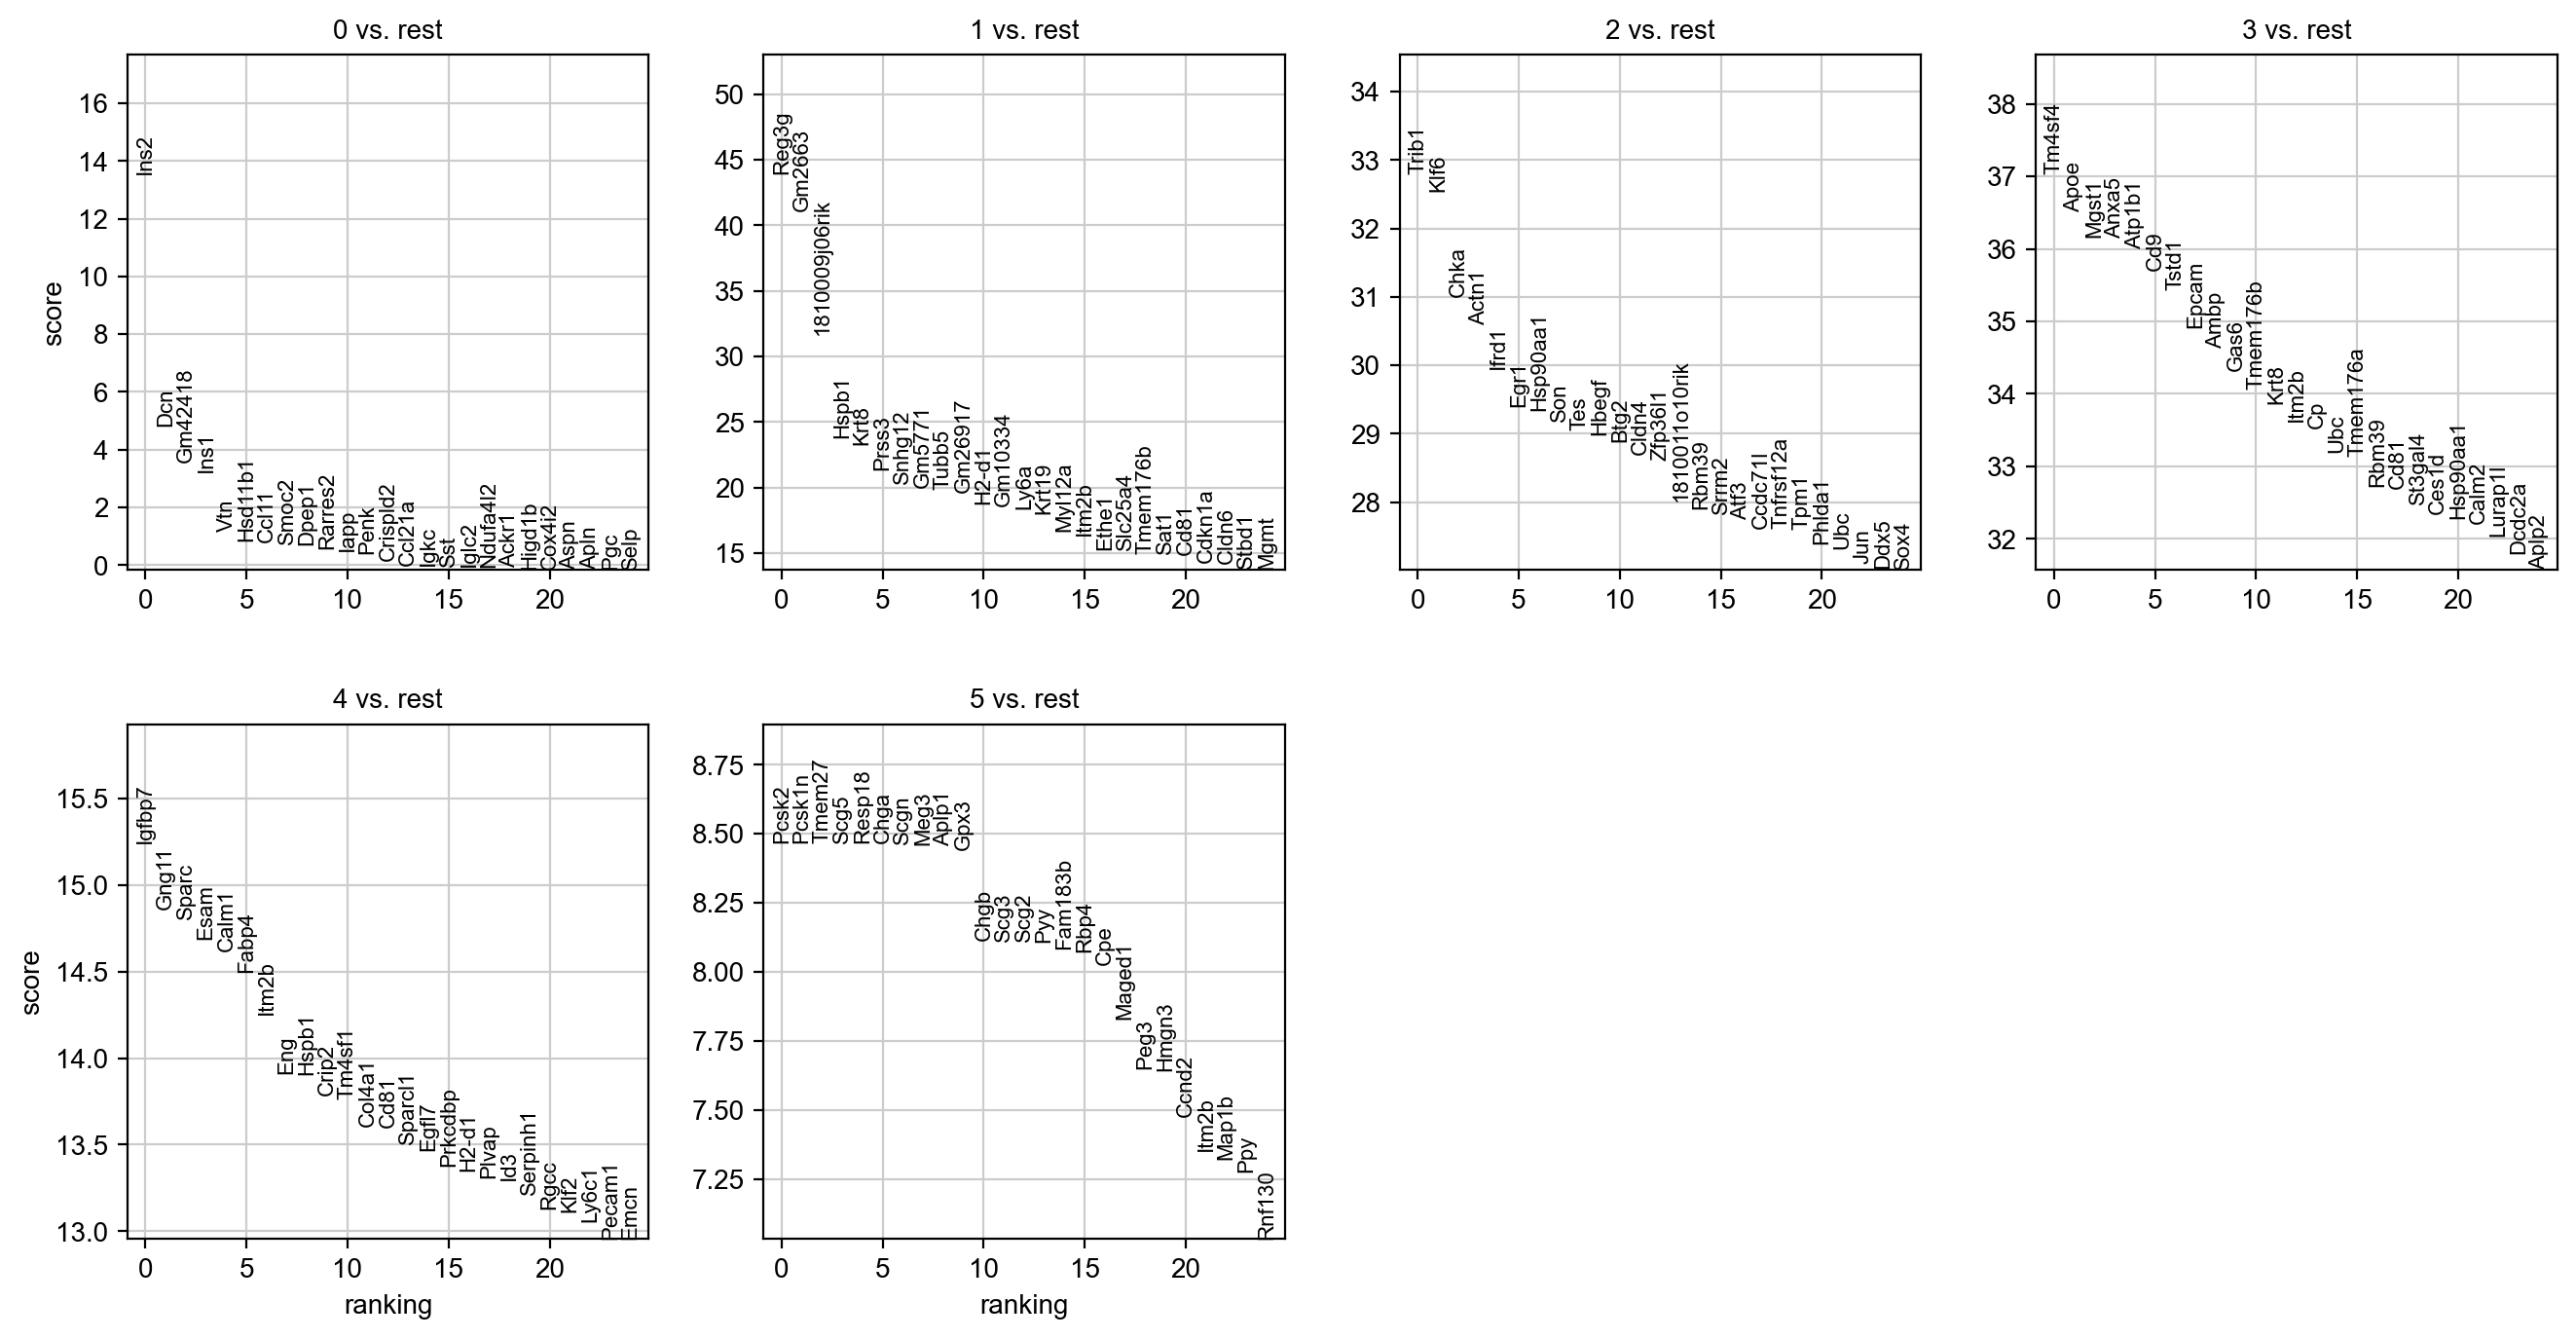

In [49]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [50]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

0              1              2         3        4        5
0       Ins2          Reg3g          Trib1    Tm4sf4   Igfbp7    Pcsk2
1        Dcn         Gm2663           Klf6      Apoe    Gng11   Pcsk1n
2    Gm42418  1810009j06rik           Chka     Mgst1    Sparc   Tmem27
3       Ins1          Hspb1          Actn1     Anxa5     Esam     Scg5
4        Vtn           Krt8          Ifrd1    Atp1b1    Calm1   Resp18
5    Hsd11b1          Prss3           Egr1       Cd9    Fabp4     Chga
6      Ccl11         Snhg12       Hsp90aa1     Tstd1    Itm2b     Scgn
7      Smoc2         Gm5771            Son     Epcam      Eng     Meg3
8      Dpep1          Tubb5            Tes      Ambp    Hspb1    Aplp1
9    Rarres2        Gm26917          Hbegf      Gas6    Crip2     Gpx3
10      Iapp          H2-d1           Btg2  Tmem176b   Tm4sf1     Chgb
11      Penk        Gm10334          Cldn4      Krt8   Col4a1     Scg3
12  Crispld2           Ly6a        Zfp36l1     Itm2b     Cd81     Scg2
13    Ccl21a          Krt19  1810011o10rik        Cp  Sparcl1      Pyy
14      Igkc         Myl12a          Rbm39       Ubc    Egfl7  Fam183b

    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

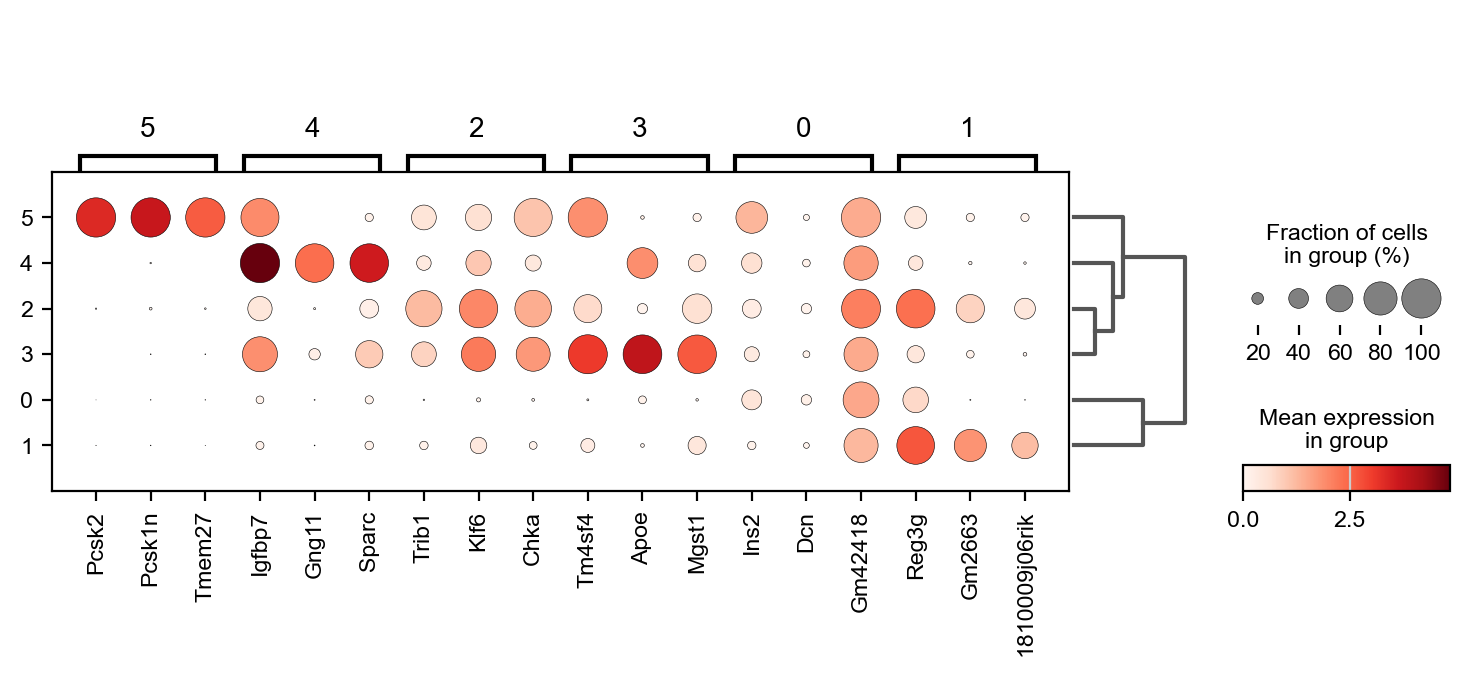

In [51]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [52]:
sigGenes = pd.read_csv("../helpAnu/data/basClaSigGenes.csv")
sigGenes = sigGenes[["scBasal","scClassical"]]
sc.tl.score_genes(adata, [gene[0]+gene[1:].lower() for gene in sigGenes["scClassical"]], score_name="classical_score",use_raw=False)
sc.tl.score_genes(adata, [gene[0]+gene[1:].lower() for gene in sigGenes["scBasal"]], score_name="basal_score",use_raw=False)

computing score 'classical_score'
    finished: added
    'classical_score', score of gene set (adata.obs).
    1176 total control genes are used. (0:00:00)
computing score 'basal_score'
    finished: added
    'basal_score', score of gene set (adata.obs).
    789 total control genes are used. (0:00:00)


In [53]:
sigFile = "data/geneSigs/rengenGeneLists/PancreasPlasticBurdziak.csv"
sigGenes = pd.read_csv(sigFile, skiprows=1)
plas = [gene[0]+gene[1:].lower() for gene in sigGenes["gene"].values[:1000]]
sc.tl.score_genes(adata, plas, score_name="plasticity_score",use_raw=False)

computing score 'plasticity_score'
    finished: added
    'plasticity_score', score of gene set (adata.obs).
    1071 total control genes are used. (0:00:00)


In [54]:
#sigFile = "data/geneSigs/rengenGeneLists/PancreasPlasticBurdziak.csv"
#sigGenes = pd.read_csv(sigFile, skiprows=1)
#plas = sigGenes["gene"].values[-4000:]
#sc.tl.score_genes(adata, plas, score_name="plas_score", use_raw=False)
#Fplas = sigGenes["gene"].values[:4000]
#sc.tl.score_genes(adata, Fplas, score_name="F_plas_score", use_raw=False)

In [73]:
homology = pd.read_table("../mhCompTiss/data/hgncHM_121.csv", sep=",")
mouseGenes = np.array(homology["mouse"])
humanGenes = np.array(homology["human"])
m2h = dict(zip(mouseGenes,humanGenes))
h2m = dict(zip(humanGenes,mouseGenes))
#[m2h[g] for g in adiGenes if g in m2h.keys()]
def convertDf(inDf, convDict):
    newGs = []
    for gs in inDf:
        newGs.append([convDict[g] for g in inDf[gs] if g in convDict.keys()])
    return(pd.DataFrame(newGs, index=inDf.columns).T)
sigFile = "data/geneSigs/multiGeneSig.xlsx"
hMultiGS = pd.read_excel(sigFile,sheet_name=2,skiprows=2)
mMultiGS = convertDf(hMultiGS, h2m)
mStressGS = mMultiGS[["Stress"]]
stress = mStressGS.dropna().values.flatten()
sc.tl.score_genes(adata, stress, score_name="stress_score", use_raw=False)


computing score 'stress_score'
    finished: added
    'stress_score', score of gene set (adata.obs).
    896 total control genes are used. (0:00:00)


In [55]:
sigFile = "../mhCompTiss/data/LUAD/humanLUADgeneSig.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = [gene[0]+gene[1:].lower() for gene in sigGenes["hpcs"]]
hpcs = hpcs[1:]
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score", use_raw=False)

computing score 'HPCS_score'
    finished: added
    'HPCS_score', score of gene set (adata.obs).
    817 total control genes are used. (0:00:00)


In [56]:
sigFile = "data/geneSigs/multiGeneSig.xlsx"
hMultiGS = pd.read_excel(sigFile,sheet_name=2,skiprows=2)
stress = hMultiGS[["Stress"]]
stress = [gene[0]+gene[1:].lower() for gene in stress.dropna().values.flatten()]
sc.tl.score_genes(adata, stress, score_name="Stress_score")

computing score 'Stress_score'
    finished: added
    'Stress_score', score of gene set (adata.obs).
    1088 total control genes are used. (0:00:00)


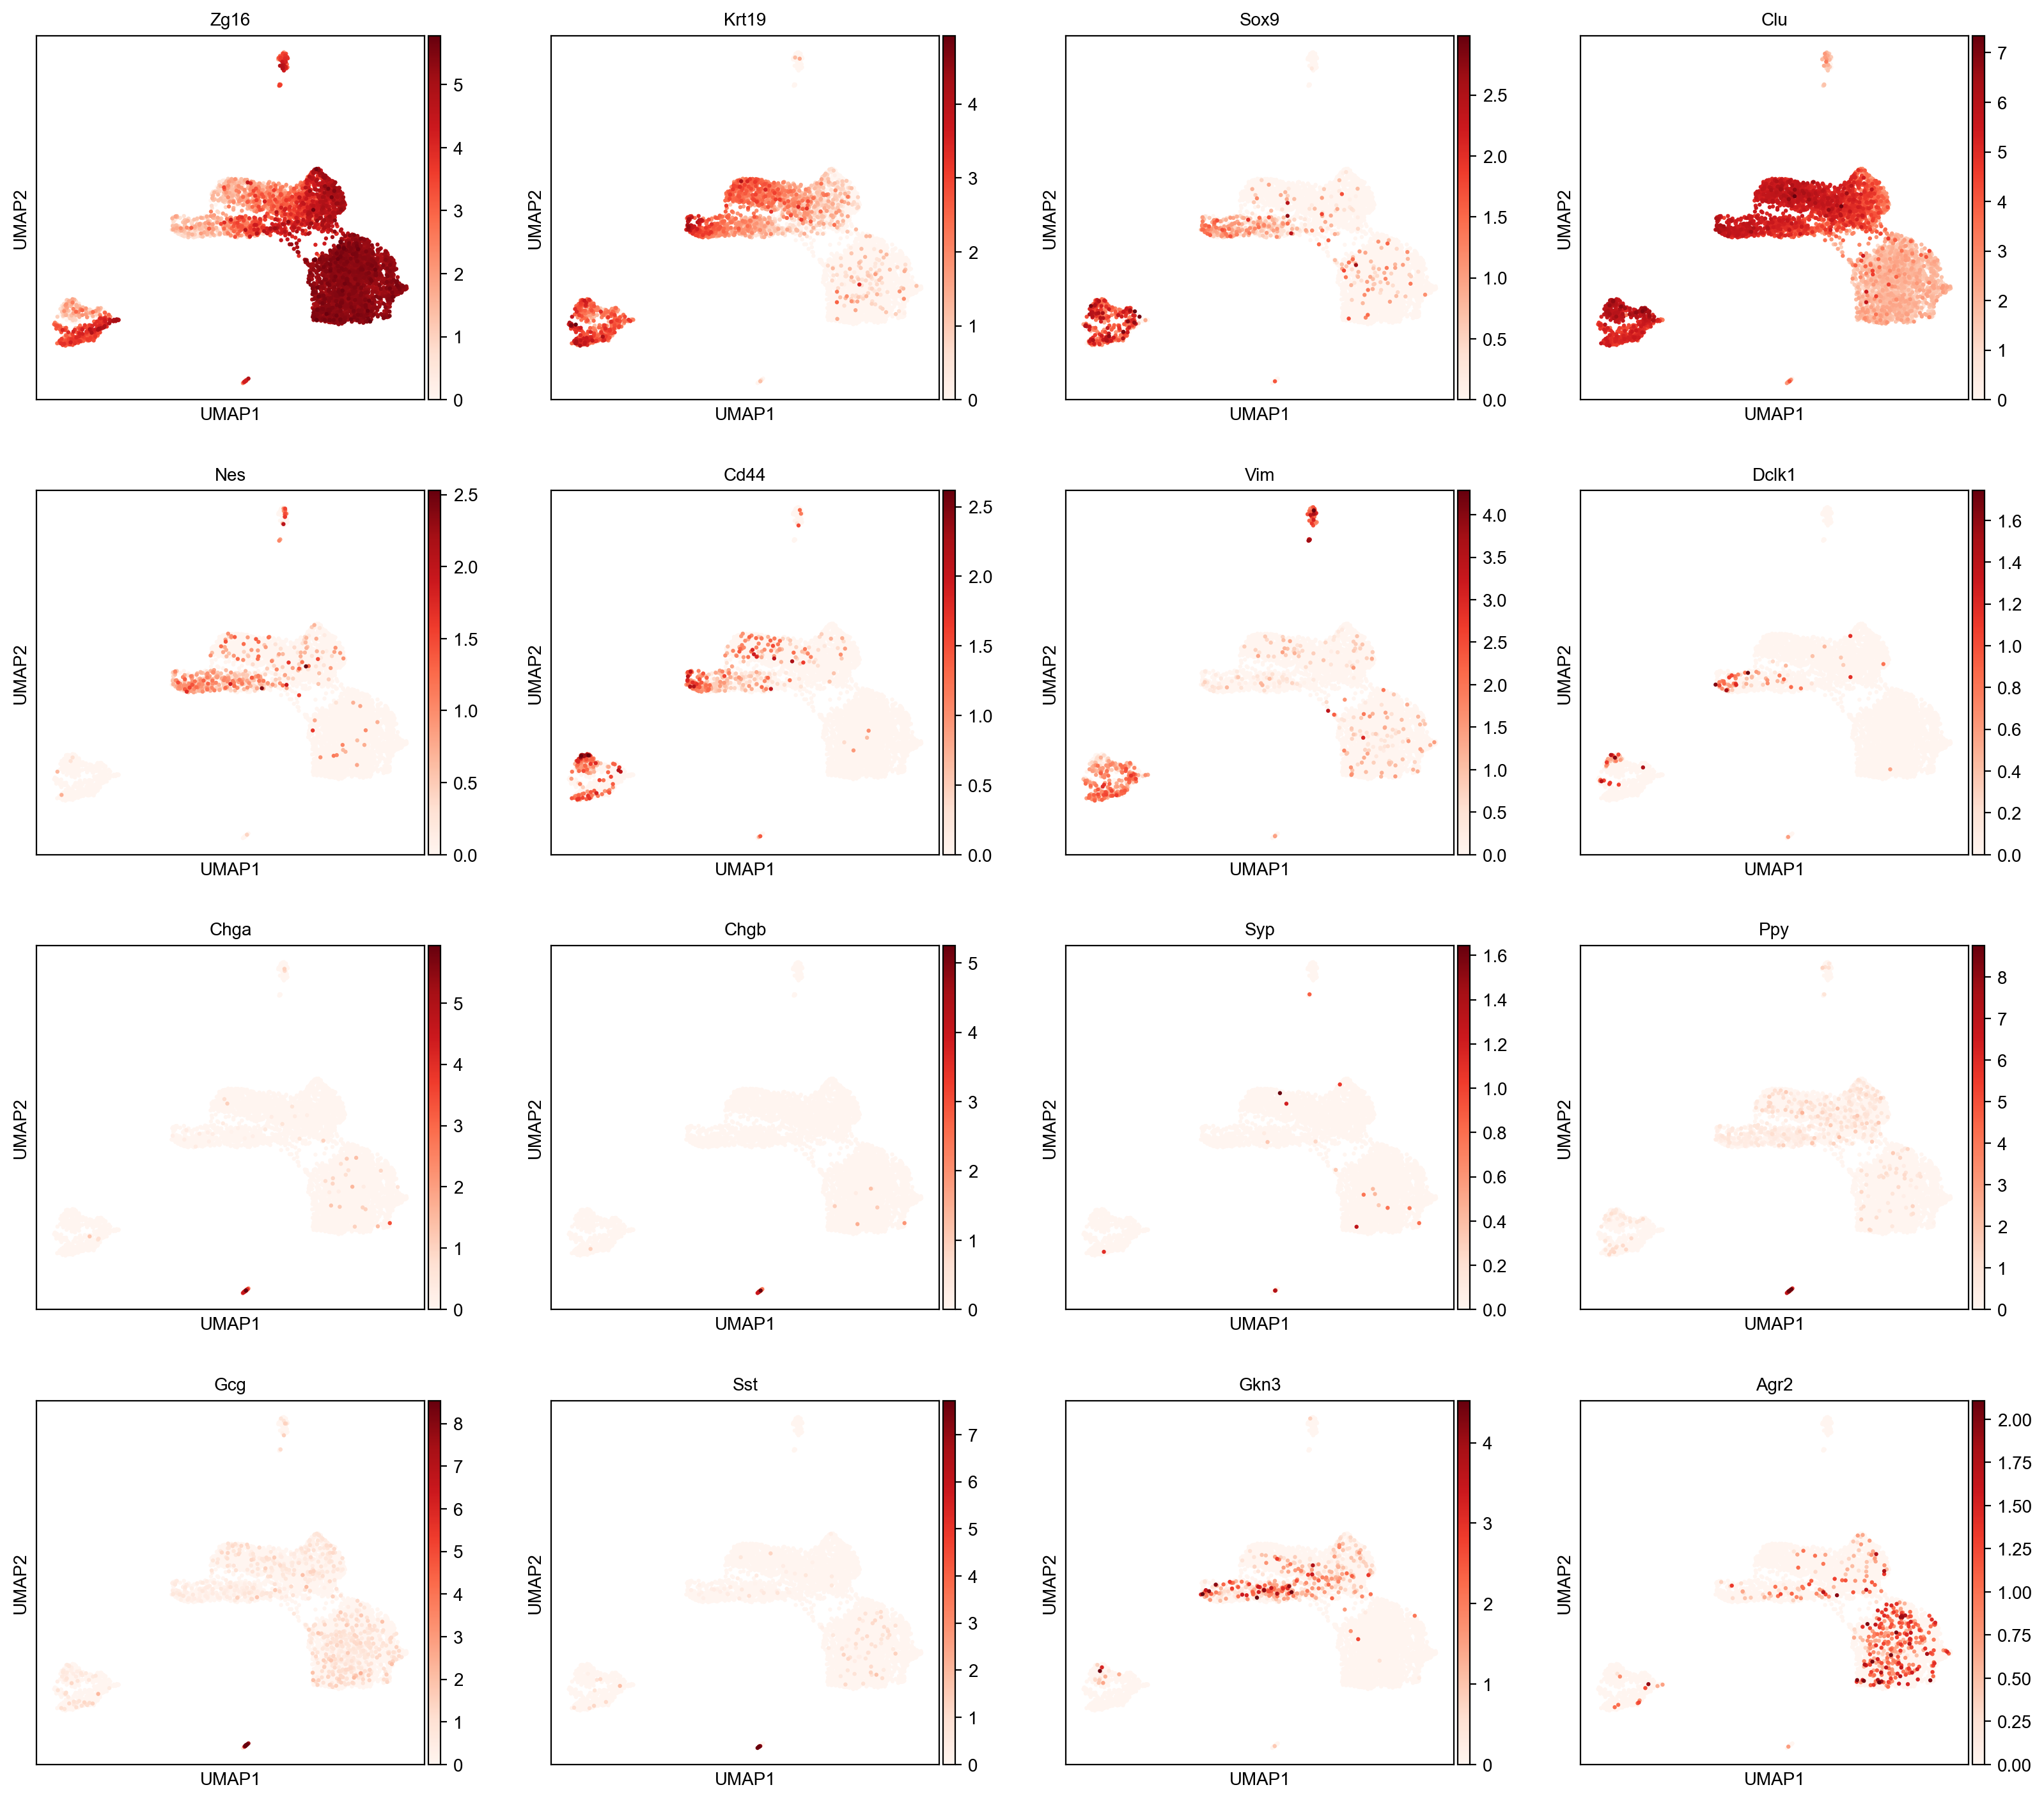

In [67]:
pancGenes = ["Zg16", #"Cpal",
"Krt19", "Sox9", "Clu", 
"Nes", "Cd44", "Vim", #"Cakn2a", 
"Dclk1", #"Trpm5", #"Pou2f3", 
"Chga", "Chgb", "Syp", "Ppy", "Gcg",  "Sst", # "Neurodl","Ins",
 "Gkn3",    "Agr2"]#"Mucl", "Muc6","Muc5ac","Iff2","Iff1",
sc.pl.umap(adata, color=pancGenes,ncols=4, cmap="Reds")

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


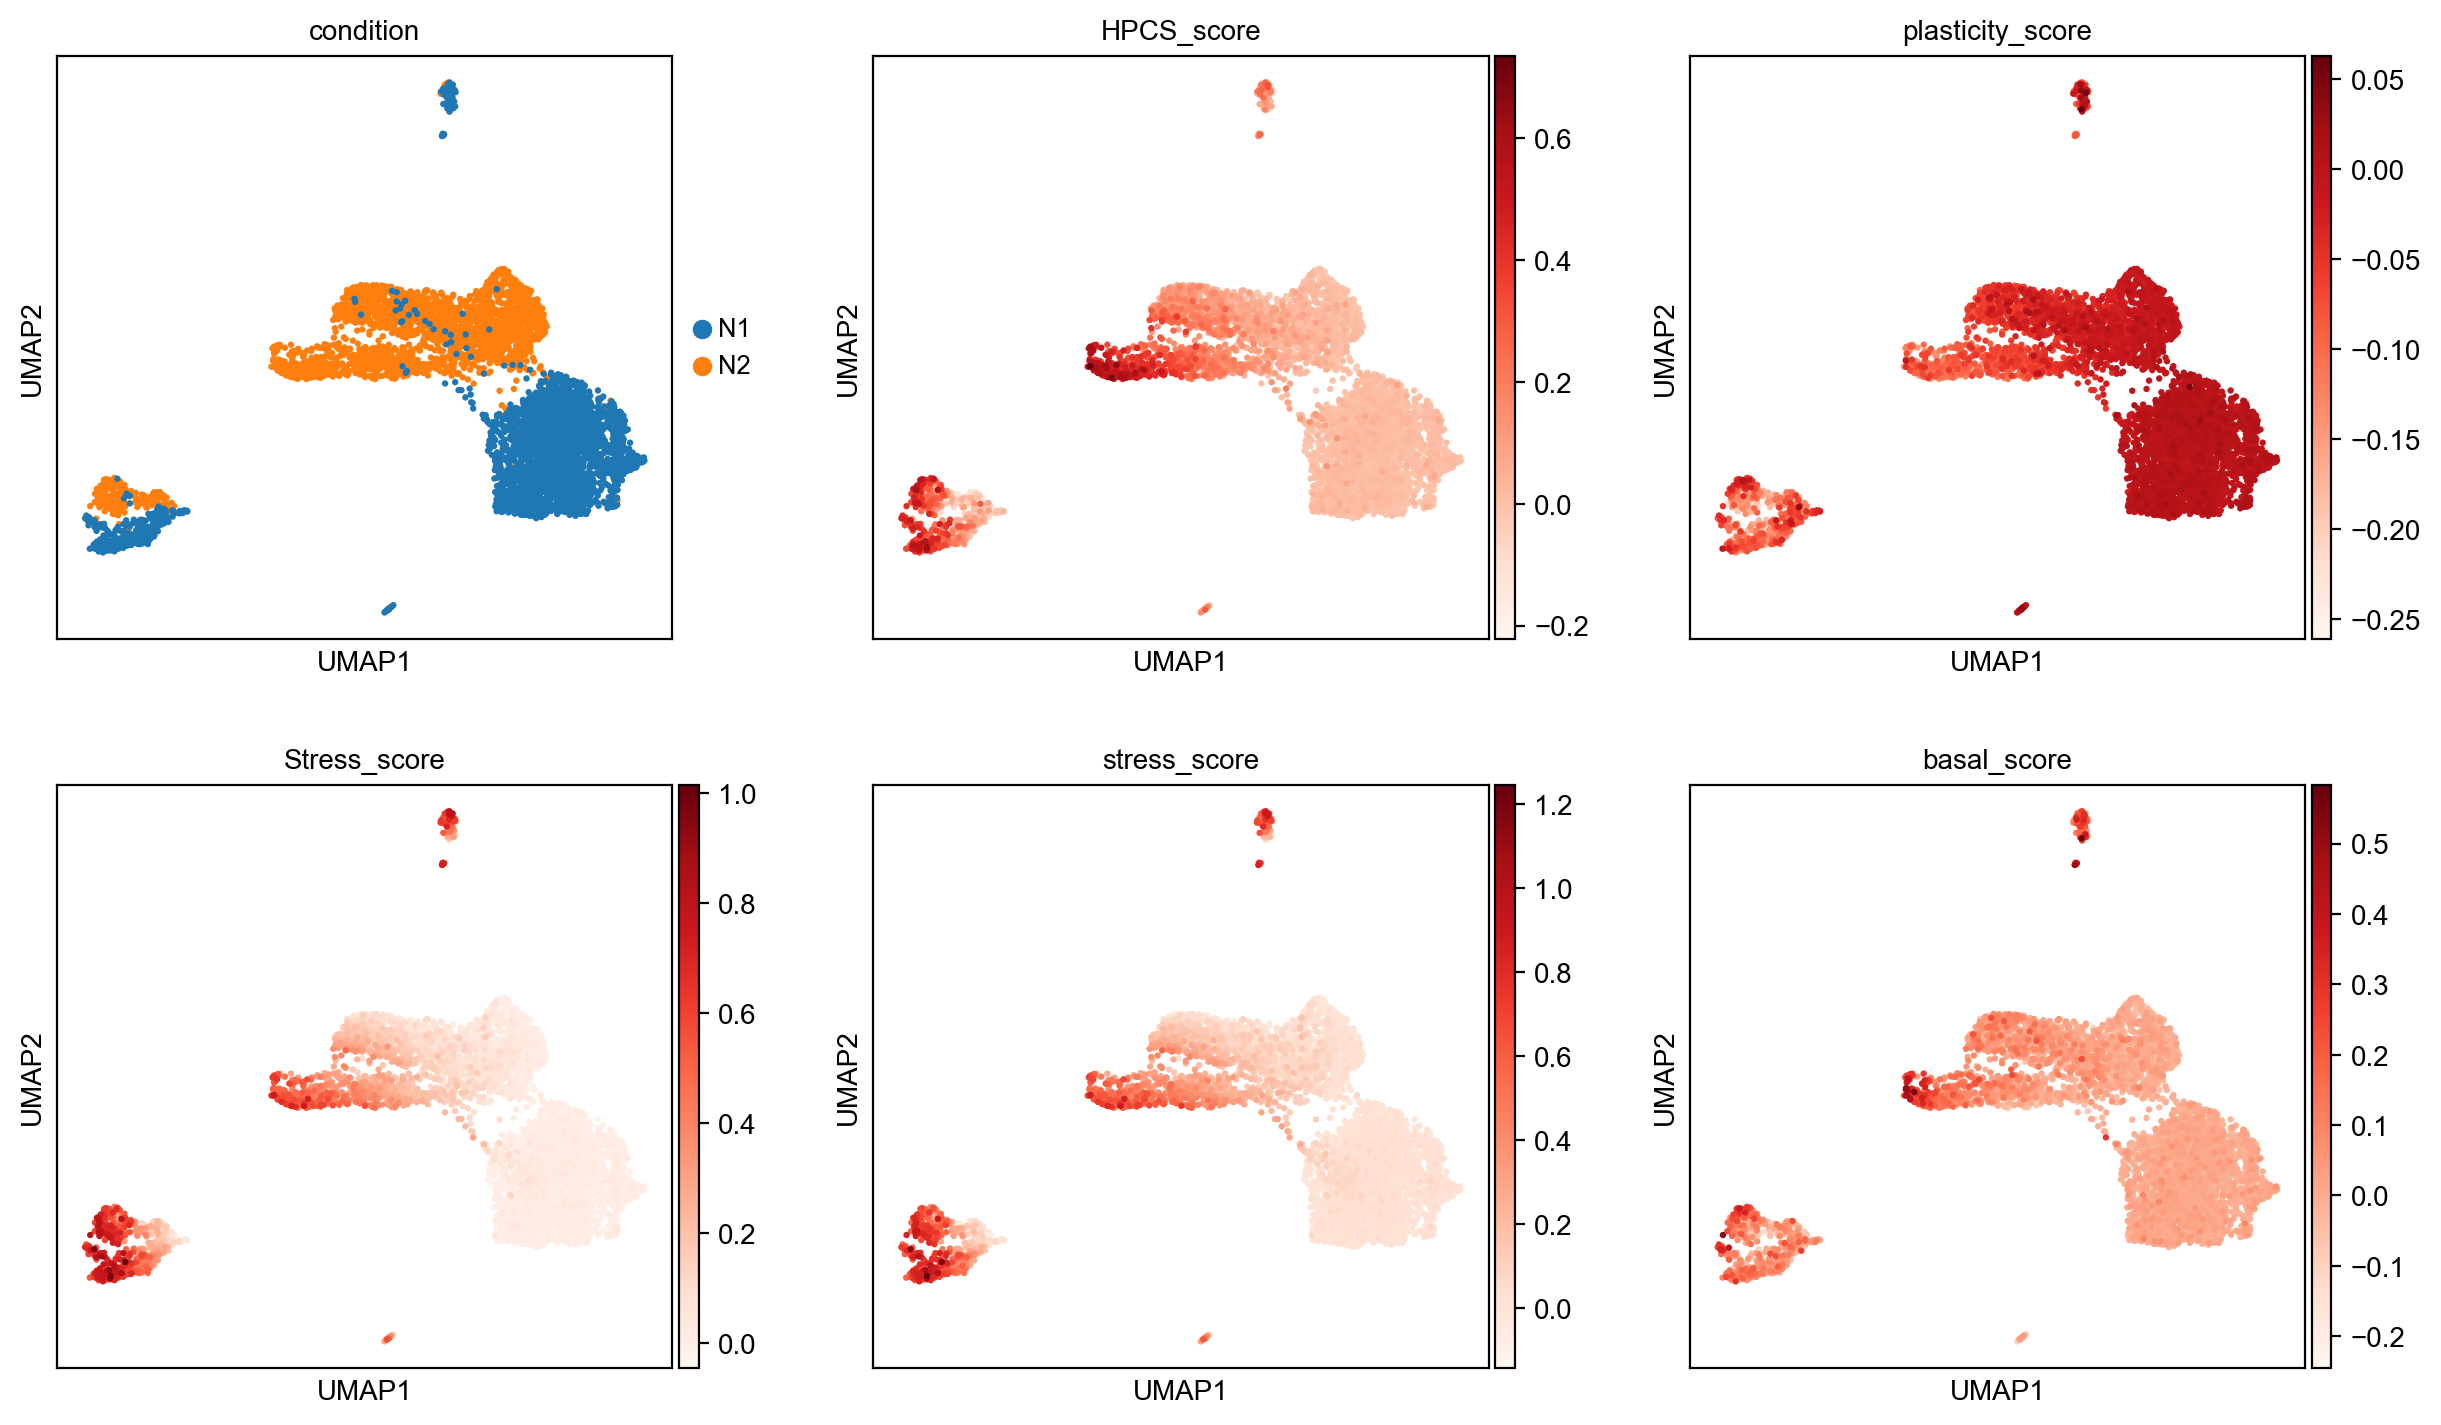

In [74]:
sc.pl.umap(adata, color=["condition","HPCS_score","plasticity_score","Stress_score","classical_score","basal_score"],ncols=3, cmap="Reds")#, vmin=0)

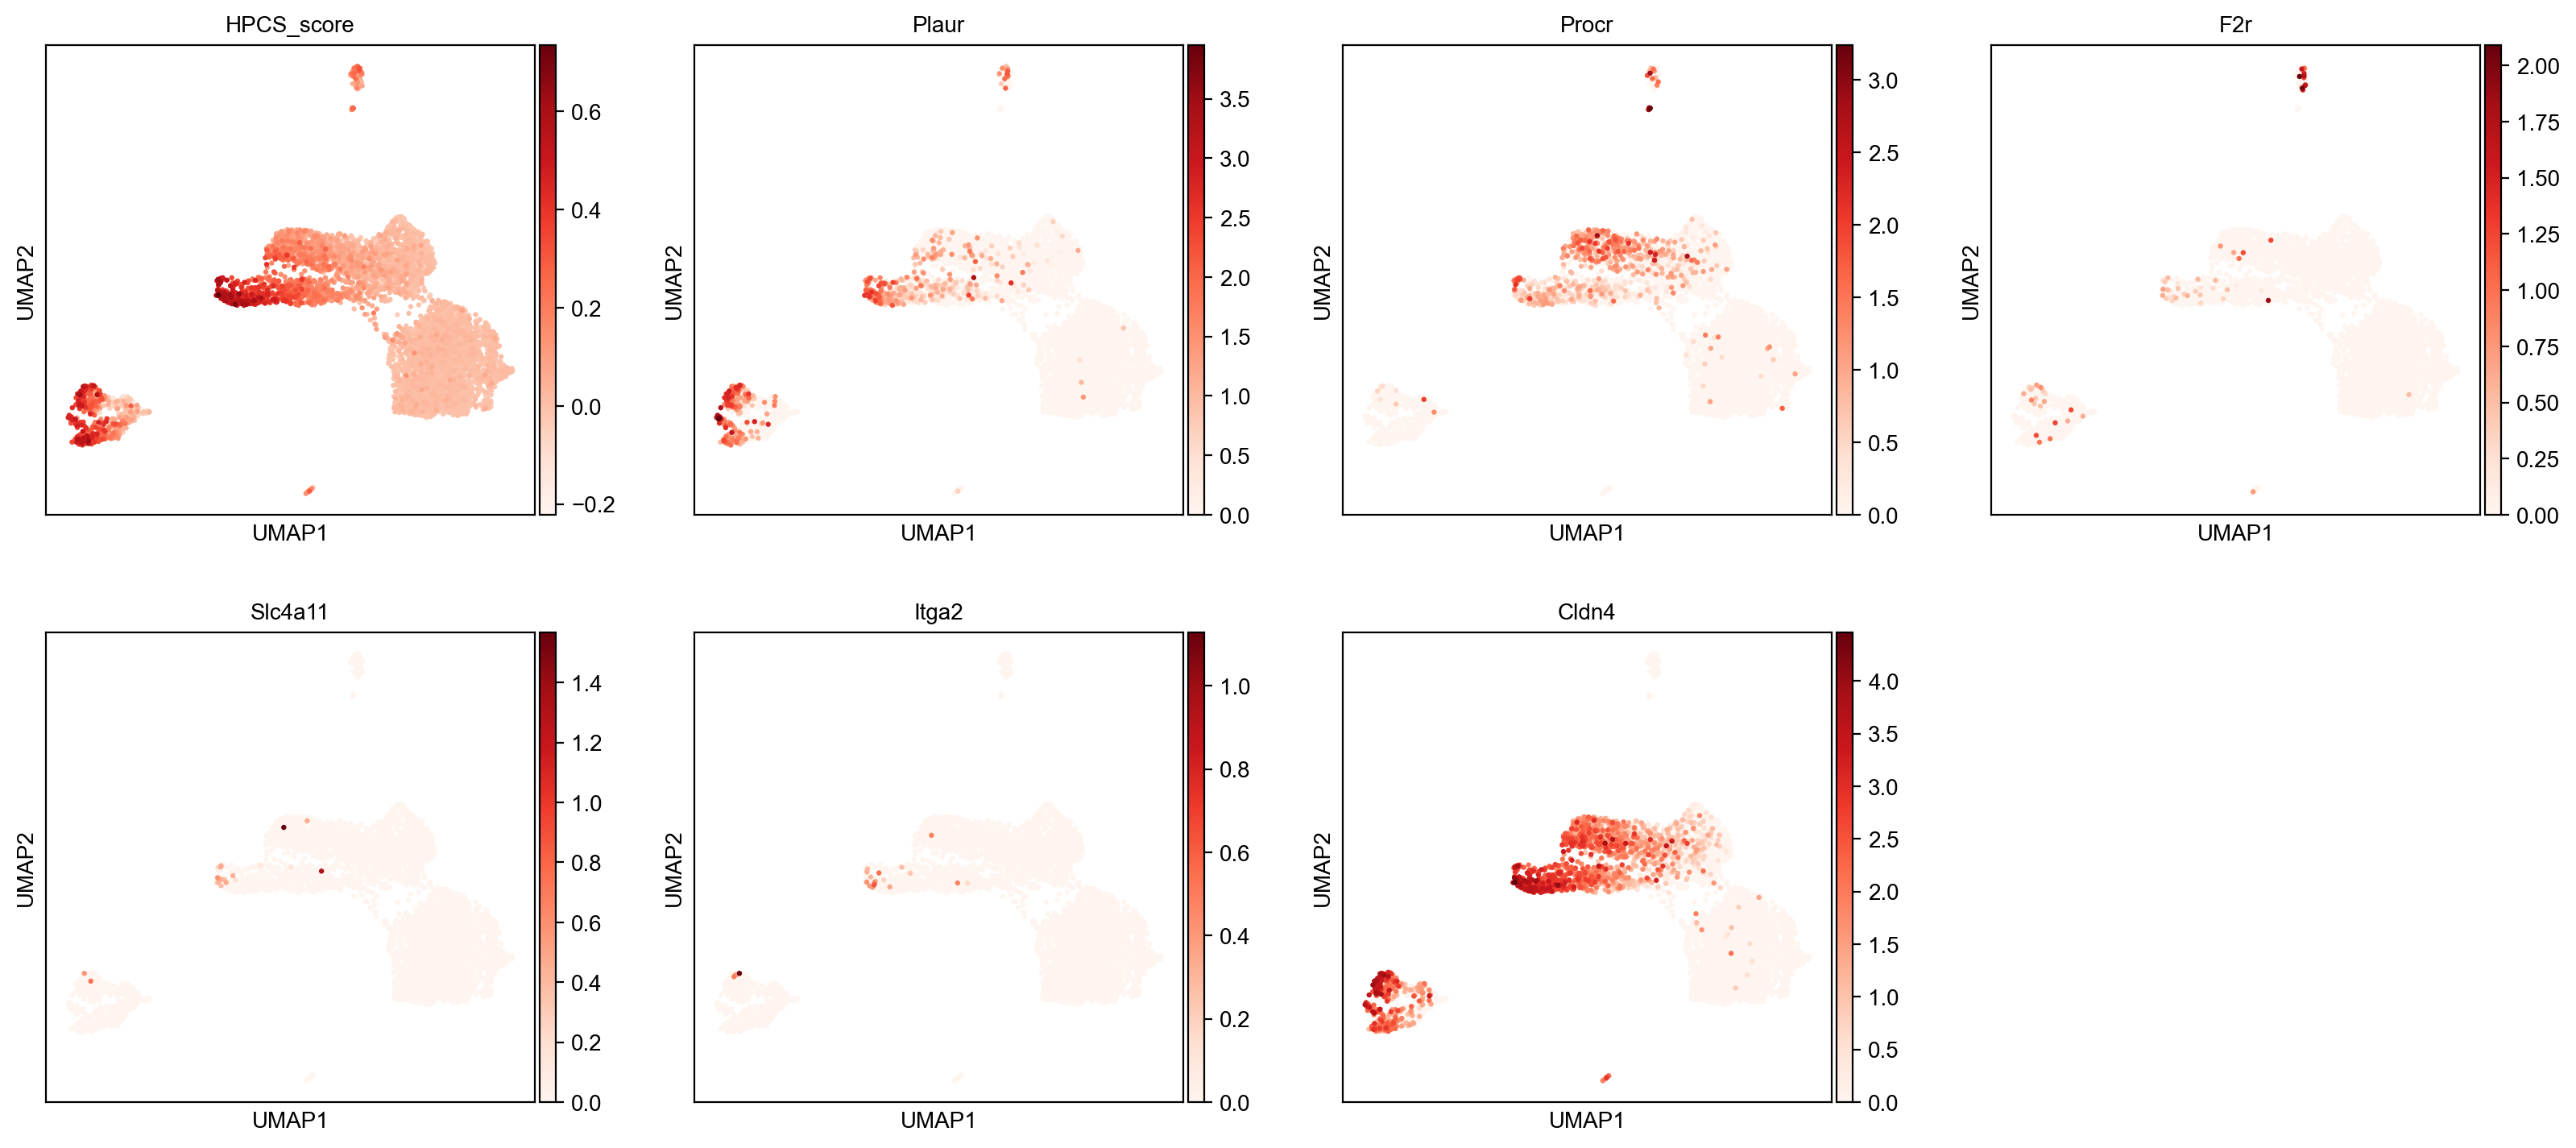

In [59]:
sc.pl.umap(adata, color=["HPCS_score","Plaur", "Procr", "F2r", "Slc4a11", "Itga2", "Cldn4"],ncols=4, cmap="Reds")

heatmap

In [71]:
from scipy import stats

def plotScatter(obsDF, xLabel, yLabel, name, save=False):
    xVal, yVal = obsDF[xLabel].values, obsDF[yLabel].values
    m, b, r_value, p_value, std_err = stats.linregress(xVal, yVal)
    
    fig, ax = plt.subplots()
    ax.grid(False)
    ax.scatter(xVal,yVal)
    ax.plot(xVal, m*xVal + b, c="red")
    ax.annotate(f"r^2: {r_value**2:.2f}", xy=(-0.05,np.max(yVal)*0.95))
    ax.annotate(f"pVal: {p_value:.2f}", xy=(-0.05,np.max(yVal)*0.9))

    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(name)
    plt.show()
    if(save):
        fig.savefig(f"{save}/{name}_{xLabel}{yLabel}_scatter.svg")

def plotBoxPlot(dataDF, label, geneExp, gene, name, save=False):
    slcPos = dataDF[label].values[geneExp]
    slcNeg = dataDF[label].values[np.logical_not(geneExp)]

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.grid(False)
    # Create box plots
    box1 = ax.violinplot(slcPos, positions=[1], showmeans=True, widths=0.6)
    box2 = ax.violinplot(slcNeg, positions=[2], showmeans=True, widths=0.6)
    
    # Perform a t-test to get the p-value
    t_stat, p_val = stats.ttest_ind(slcPos, slcNeg)
    
    # Add p-value bracket and stars to the plot
    x1, x2 = 1, 2
    y, h, col = max(np.max(slcPos), np.max(slcNeg)), 0.1, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h-0.1, f'{p_val:.3e}', ha='center', va='bottom', color=col)
    
    # Add stars based on p-value significance
    if p_val < 0.001:
        stars = '***'
    elif p_val < 0.01:
        stars = '**'
    elif p_val < 0.05:
        stars = '*'
    else:
        stars = 'ns'  # not significant
    
    ax.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom', color=col)
    
    # Add p-value text to the plot
    #plt.text(1.5, max(np.max(slcPos), np.max(slcNeg)), f'p-value: {p_val:.3e}', ha='center')
    
    # Set x-axis labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels([f'{gene}+', f'{gene}-'])
    
    # Set title and labels
    ax.set_title(name)
    ax.set_ylabel(f'{label} Score')
    
    # Show the plot
    plt.show()
    if(save):
        fig.savefig(f"{save}/{name}{label}_{gene}.svg")

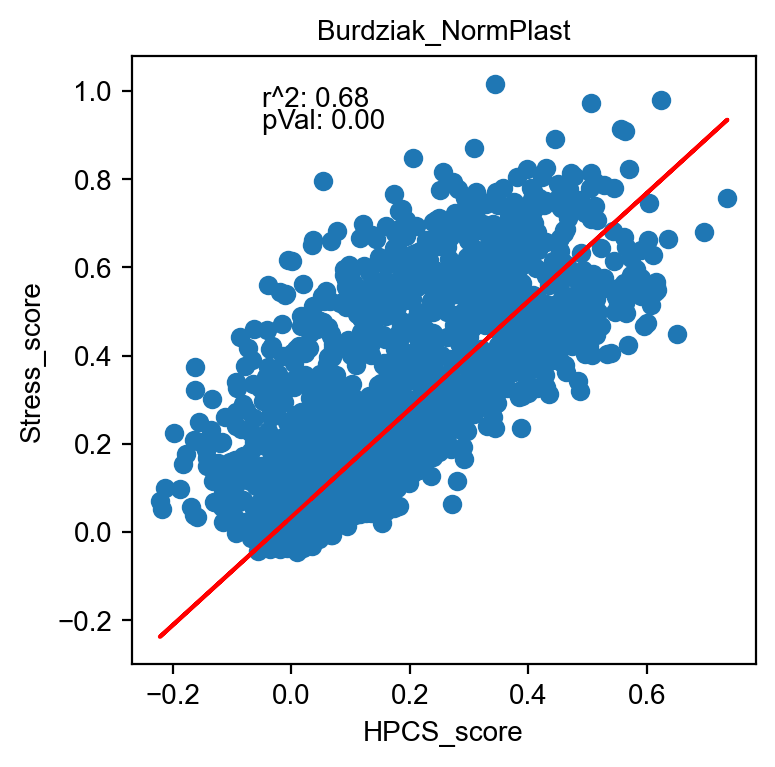

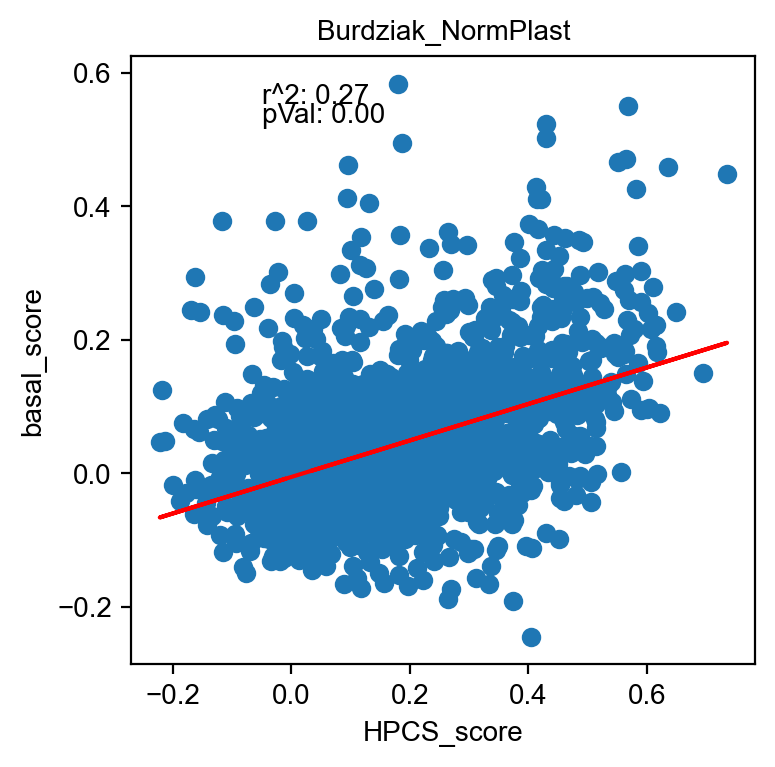

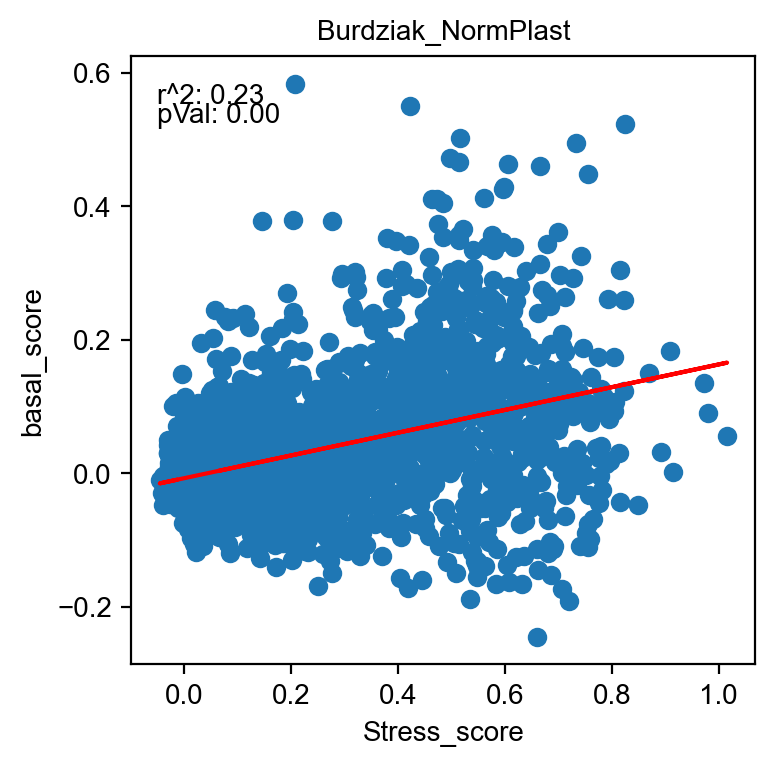

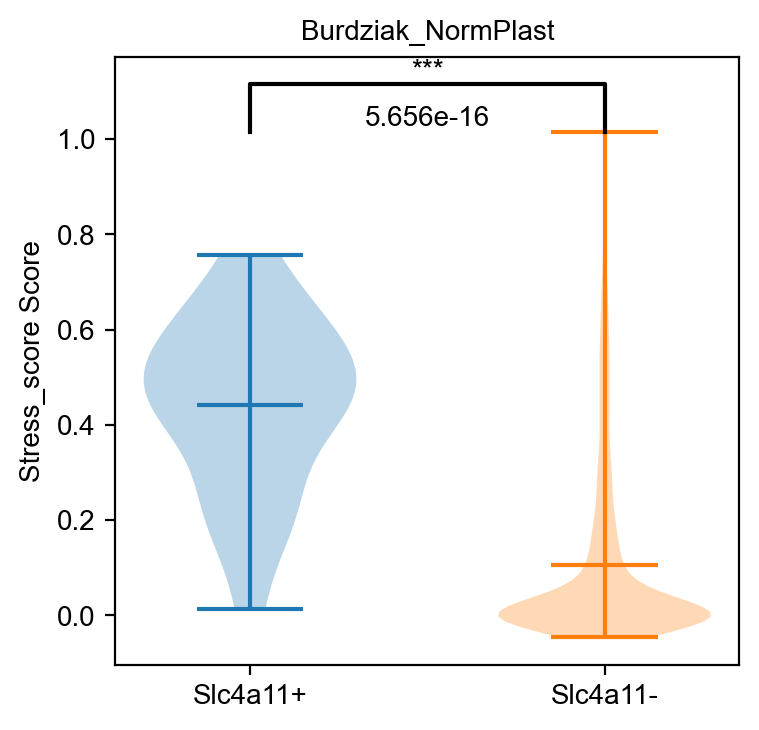

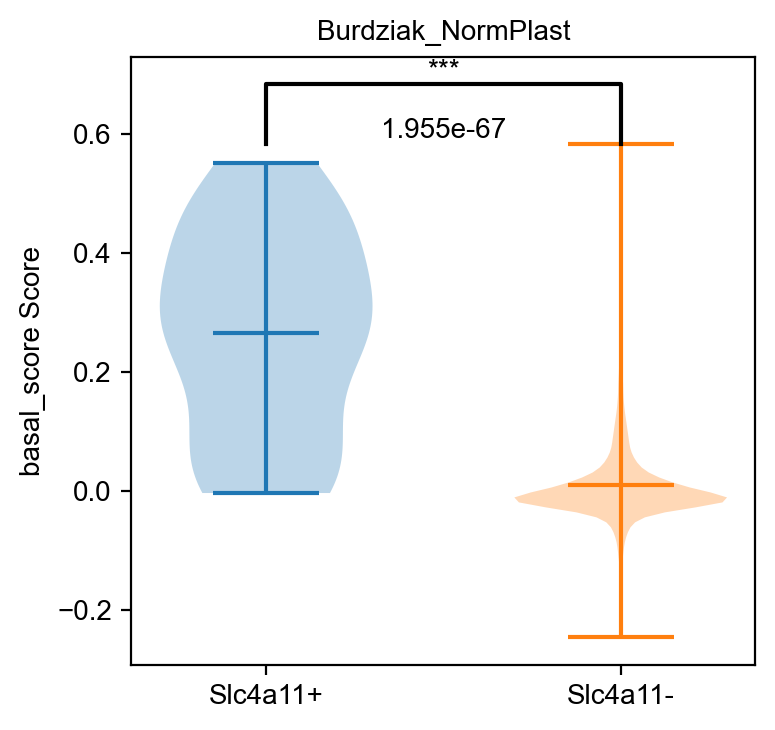

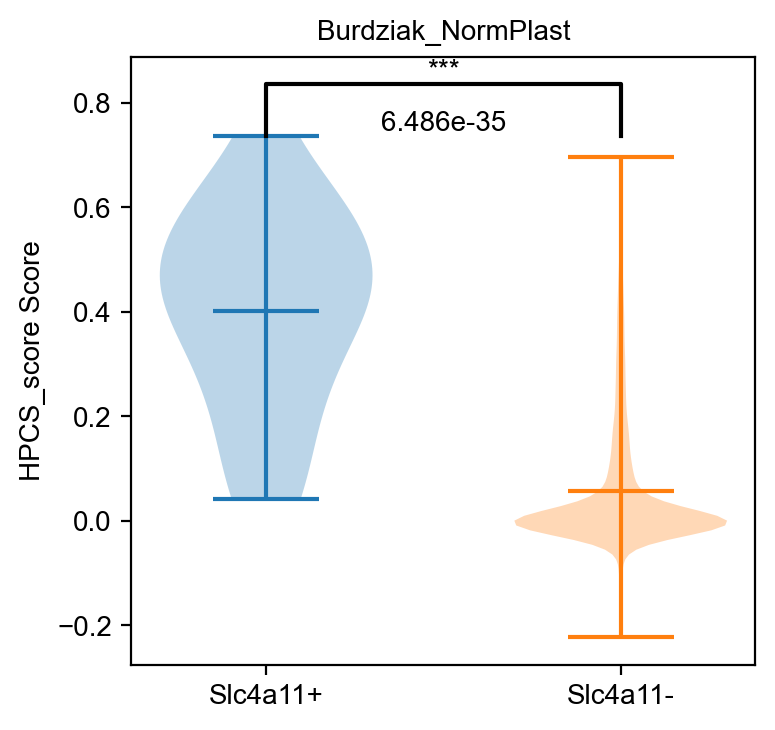

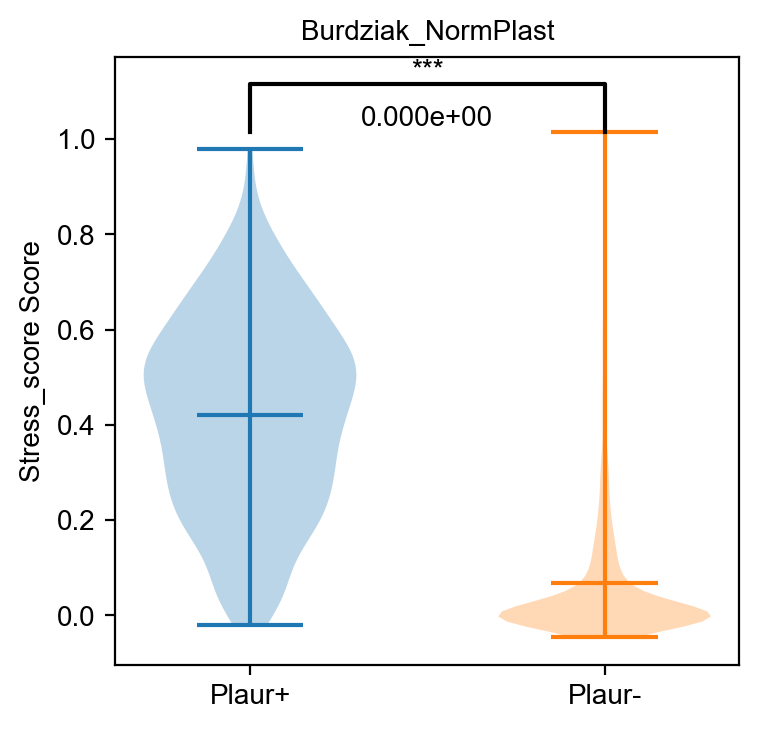

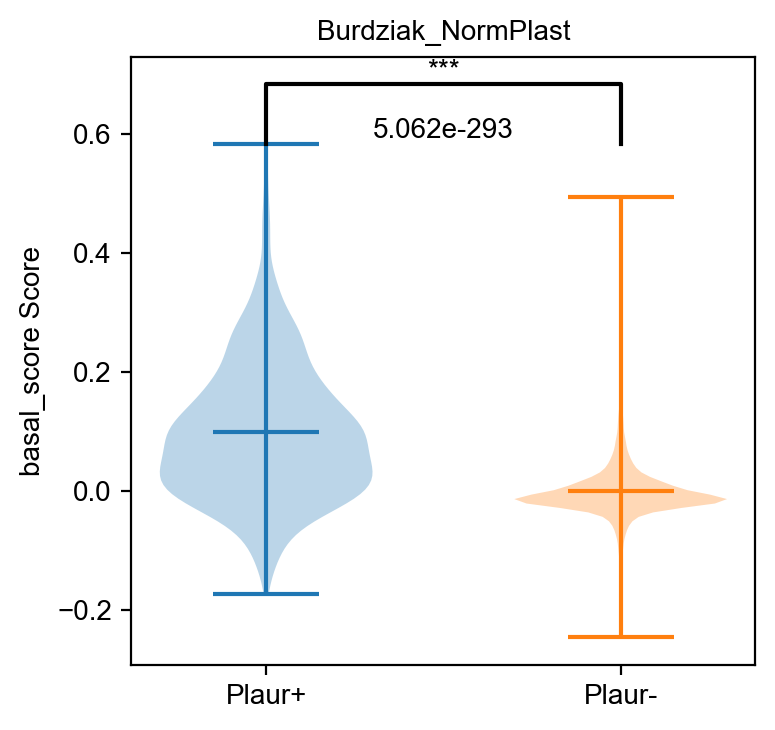

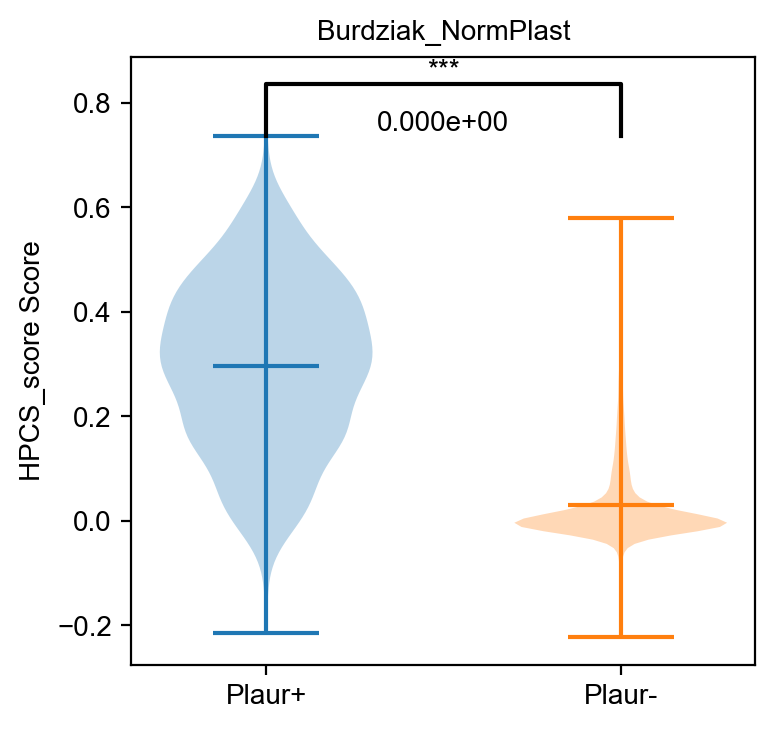

In [76]:
saveDir = "figures/revisions4"
key="Burdziak_NormPlast"

plotScatter(adata.obs, "HPCS_score","Stress_score", key)
plotScatter(adata.obs, "HPCS_score","basal_score", key)
plotScatter(adata.obs, "Stress_score","basal_score", key)
rdata = adata.raw.to_adata()

slc="Slc4a11"
if(isinstance(rdata.X, np.ndarray)):
    slcScore = np.array(rdata[:,rdata.var_names==slc].X).flatten() > 0
    parScore = np.array(rdata[:,rdata.var_names=="Plaur"].X).flatten() > 0
else:
    slcScore = np.array(rdata[:,rdata.var_names==slc].X.todense()).flatten() > 0
    parScore = np.array(rdata[:,rdata.var_names=="Plaur"].X.todense()).flatten() > 0

plotBoxPlot(adata.obs, "Stress_score", slcScore, slc, key, save=saveDir)
plotBoxPlot(adata.obs, "basal_score", slcScore, slc, key, save=saveDir)
plotBoxPlot(adata.obs, "HPCS_score", slcScore, slc, key, save=saveDir)

plotBoxPlot(adata.obs, "Stress_score", parScore, "Plaur", key, save=saveDir)
plotBoxPlot(adata.obs, "basal_score", parScore, "Plaur", key, save=saveDir)
plotBoxPlot(adata.obs, "HPCS_score", parScore, "Plaur", key, save=saveDir)

In [79]:
resultsFile

'write/Pancreas_Norm_Burdziak.h5ad'

In [80]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 5626 × 2242
    obs: 'batch', 'condition', 'cluster', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'classical_score', 'basal_score', 'plasticity_score', 'HPCS_score', 'Stress_score', 'stress_score'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'condition_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_EMBED', 'X_PCA', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

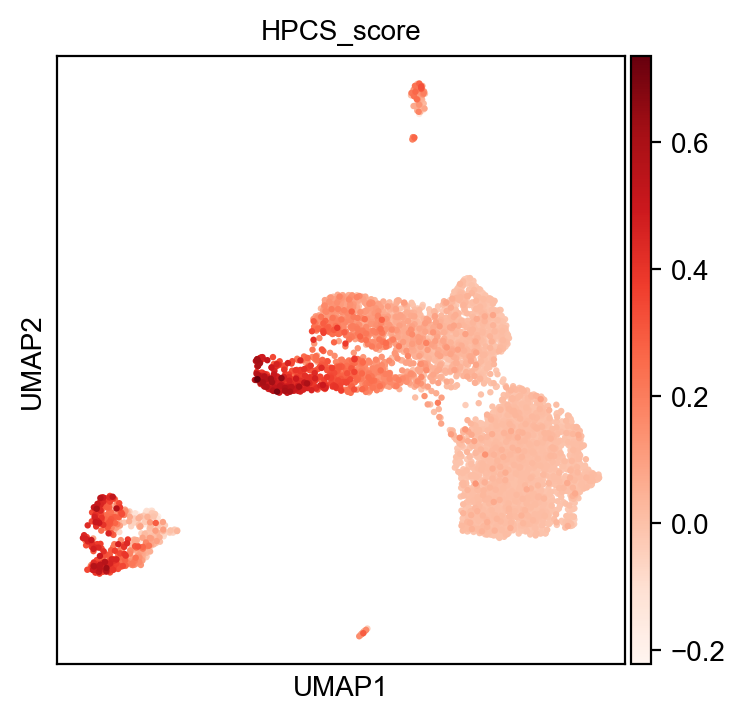

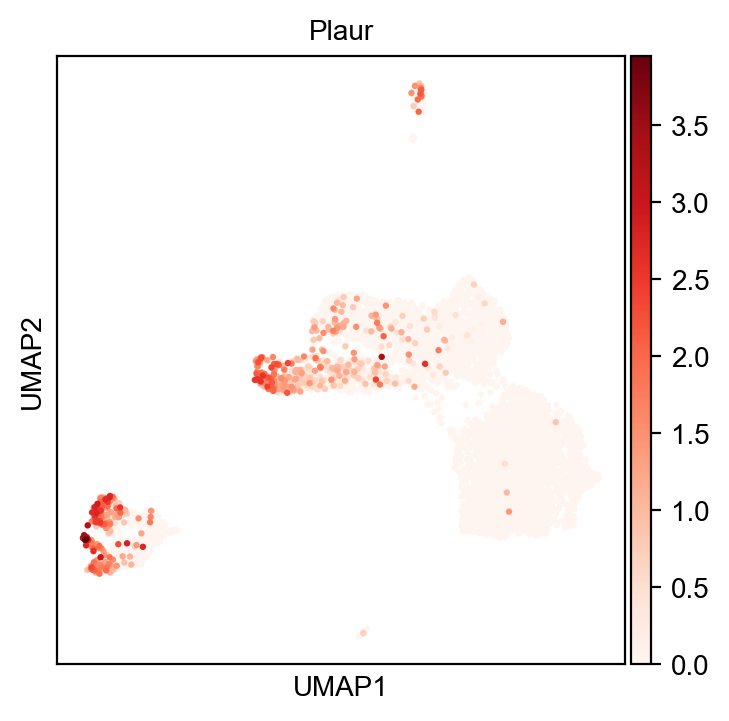

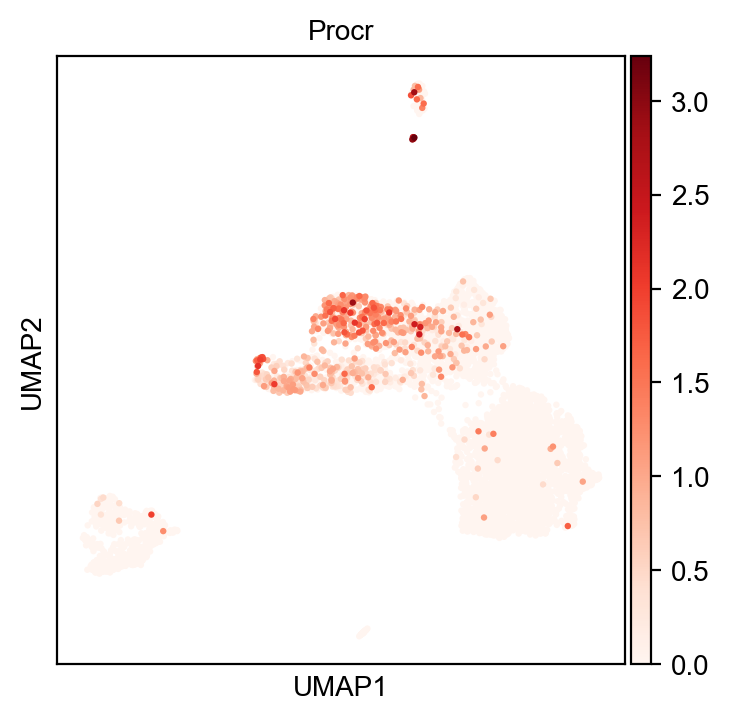

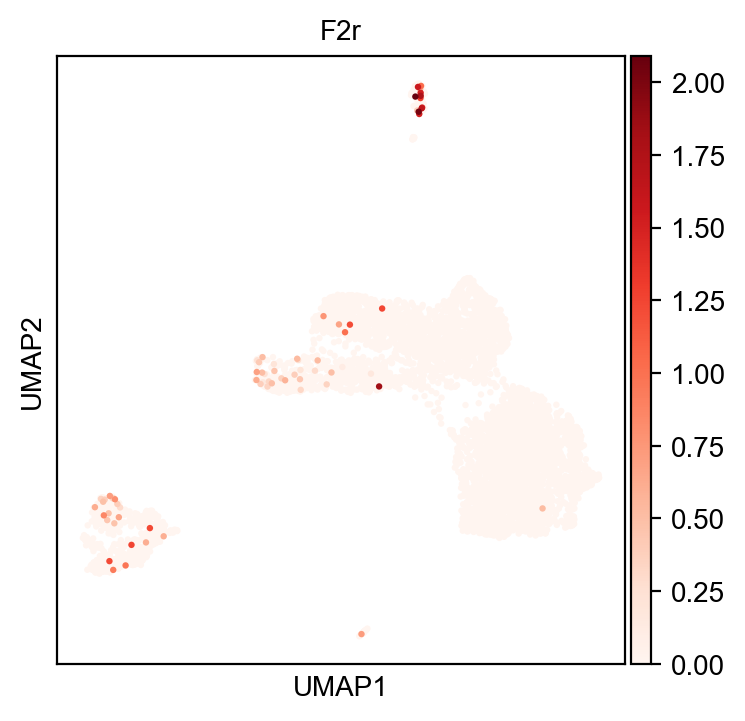

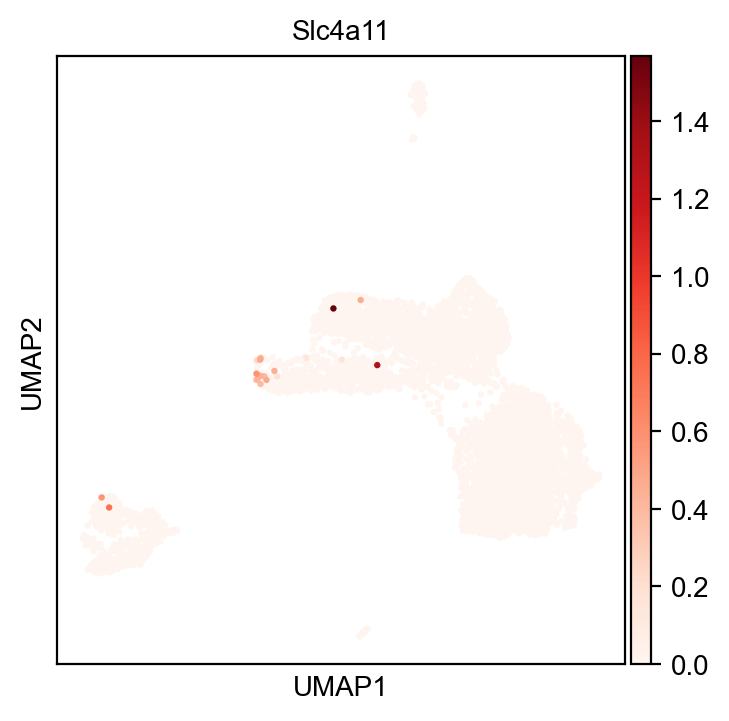

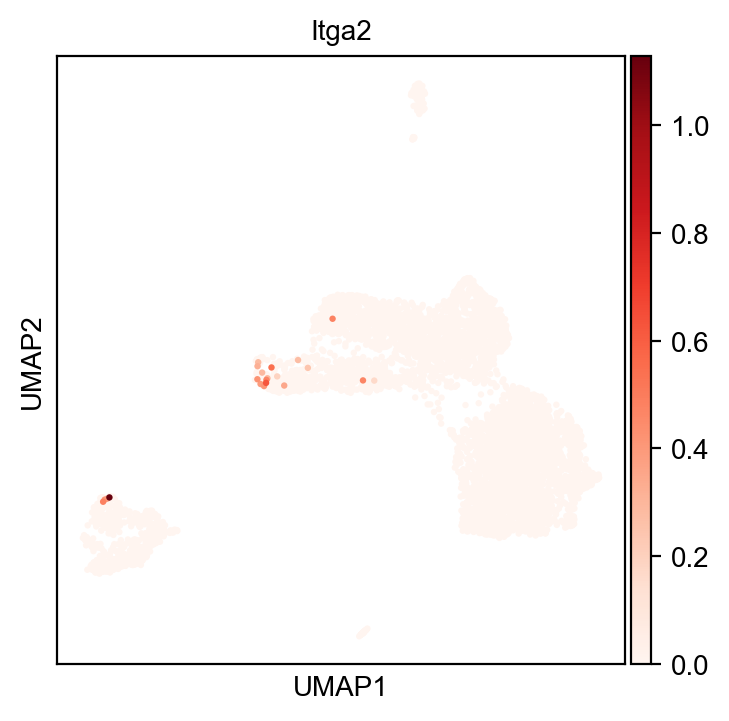

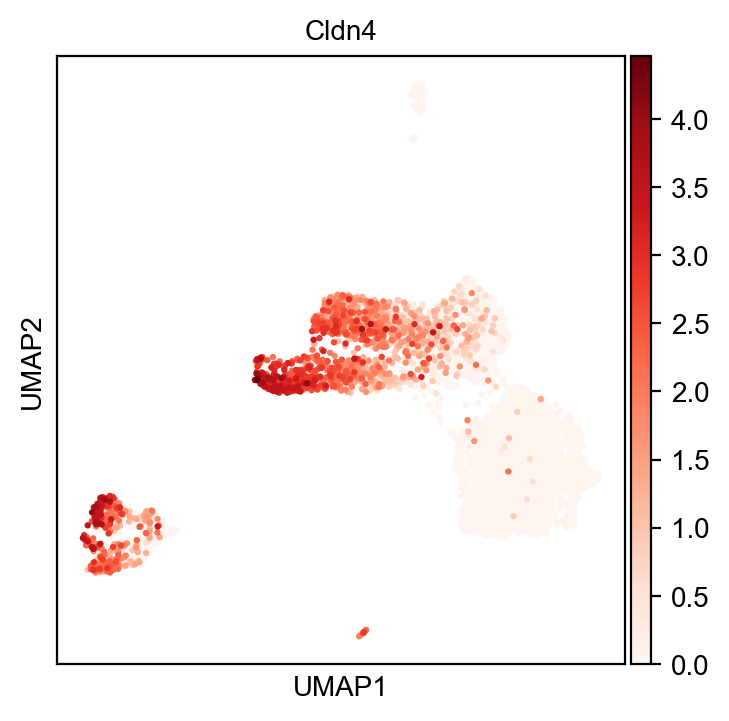

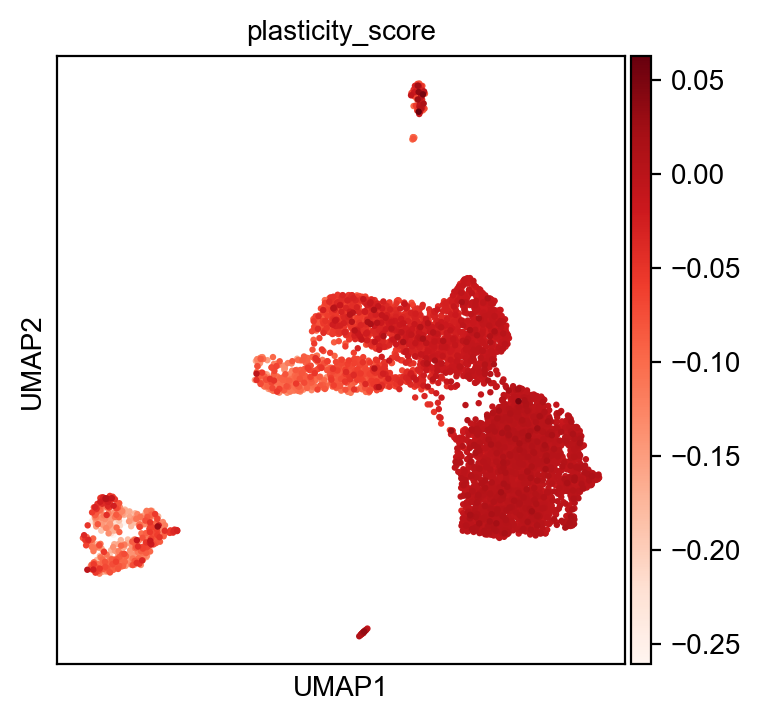

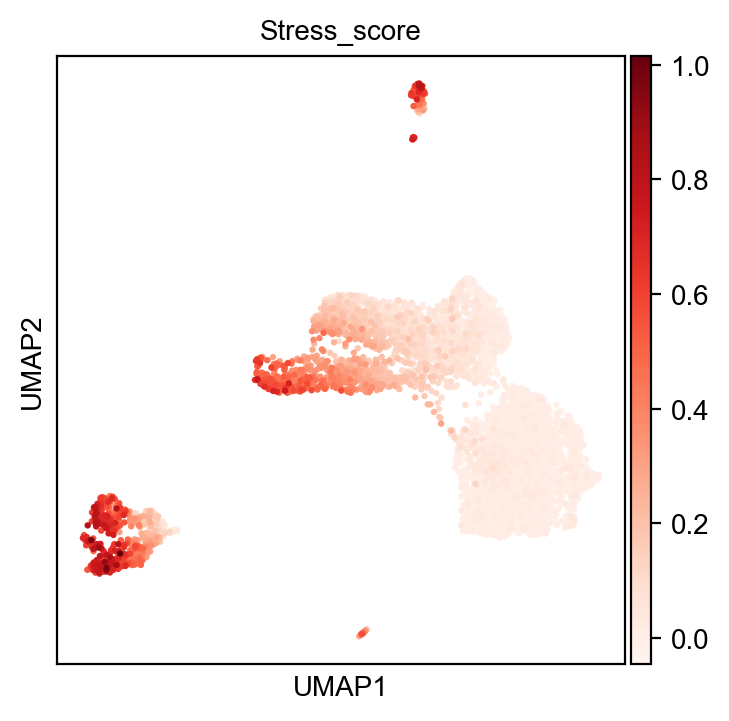

In [78]:
sc.settings.figdir = saveDir
for col in ["HPCS_score","Plaur", "Procr", "F2r", 
            "Slc4a11", "Itga2", "Cldn4","plasticity_score","Stress_score"]:
    sc.pl.umap(adata, color=col,ncols=1, cmap="Reds", save=f"{col}_{key}.svg")

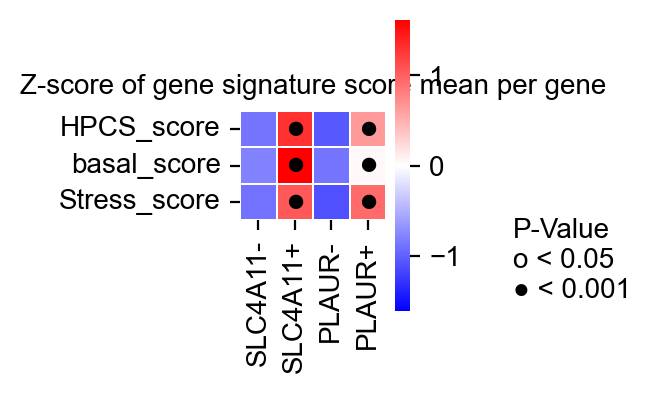

In [84]:
from sklearn import preprocessing

gSigs = ["HPCS_score","basal_score","Stress_score"]
genes = ["Slc4a11","Plaur"]
avgScores = np.zeros((len(gSigs),len(genes)*2))
pvalScores = np.zeros((len(gSigs),len(genes)))

for gi, gene in enumerate(genes):

    if(isinstance(rdata.X, np.ndarray)):
        geneExp = np.array(rdata[:,rdata.var_names==gene].X).flatten() > 0
    else:
        geneExp = np.array(rdata[:,rdata.var_names==gene].X.todense()).flatten() > 0

    for gsi,gs in enumerate(gSigs):
            
        geneExpPos = adata.obs[gs][geneExp]
        geneExpNeg = adata.obs[gs][np.logical_not(geneExp)]
        
        avgScores[gsi,gi*2] = np.mean(geneExpPos)
        avgScores[gsi,gi*2+1] = np.mean(geneExpNeg)
        
        t_stat, p_val = stats.ttest_ind(geneExpPos, geneExpNeg)
        pvalScores[gsi,gi] = p_val


scaler = preprocessing.StandardScaler().fit_transform(avgScores.T)
avgScoresDF = pd.DataFrame(scaler[[1,0,3,2]].T, index=gSigs, columns=['SLC4A11-', 'SLC4A11+', 'PLAUR-','PLAUR+']) #

fig, ax = plt.subplots(figsize=(2.2,2.2)) 
plt.grid(False)
sns.heatmap(avgScoresDF, cmap="bwr", xticklabels=True, ax=ax, square=True, linewidths=0.1, cbar=True,
            vmax = max(np.max(avgScoresDF),-1.0*np.min(avgScoresDF)),
            vmin = -1.0*max(np.max(avgScoresDF),-1.0*np.min(avgScoresDF)))
for (i, j), significant in np.ndenumerate(pvalScores):
    #print(i,j)
    if significant < 0.001:
        plt.text(j*2 + 1.5, i + 0.5, "●", color='black', ha='center', va='center', fontsize=12)
    elif significant < 0.05:
        plt.text(j*2 + 1.5, i + 0.5, 'o', color='black', ha='center', va='center', fontsize=12)
     
ax.set_title(f"Z-score of gene signature score mean per gene")
ax.tick_params(axis='y', labelrotation=0)
fig.text(1.1, 0.3, f"P-Value\no < 0.05\n● < 0.001")
fig.tight_layout()
plt.show()
fig.savefig(f"{saveDir}/zscore_{key}_GsSlc4a11PalurPval.svg")

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

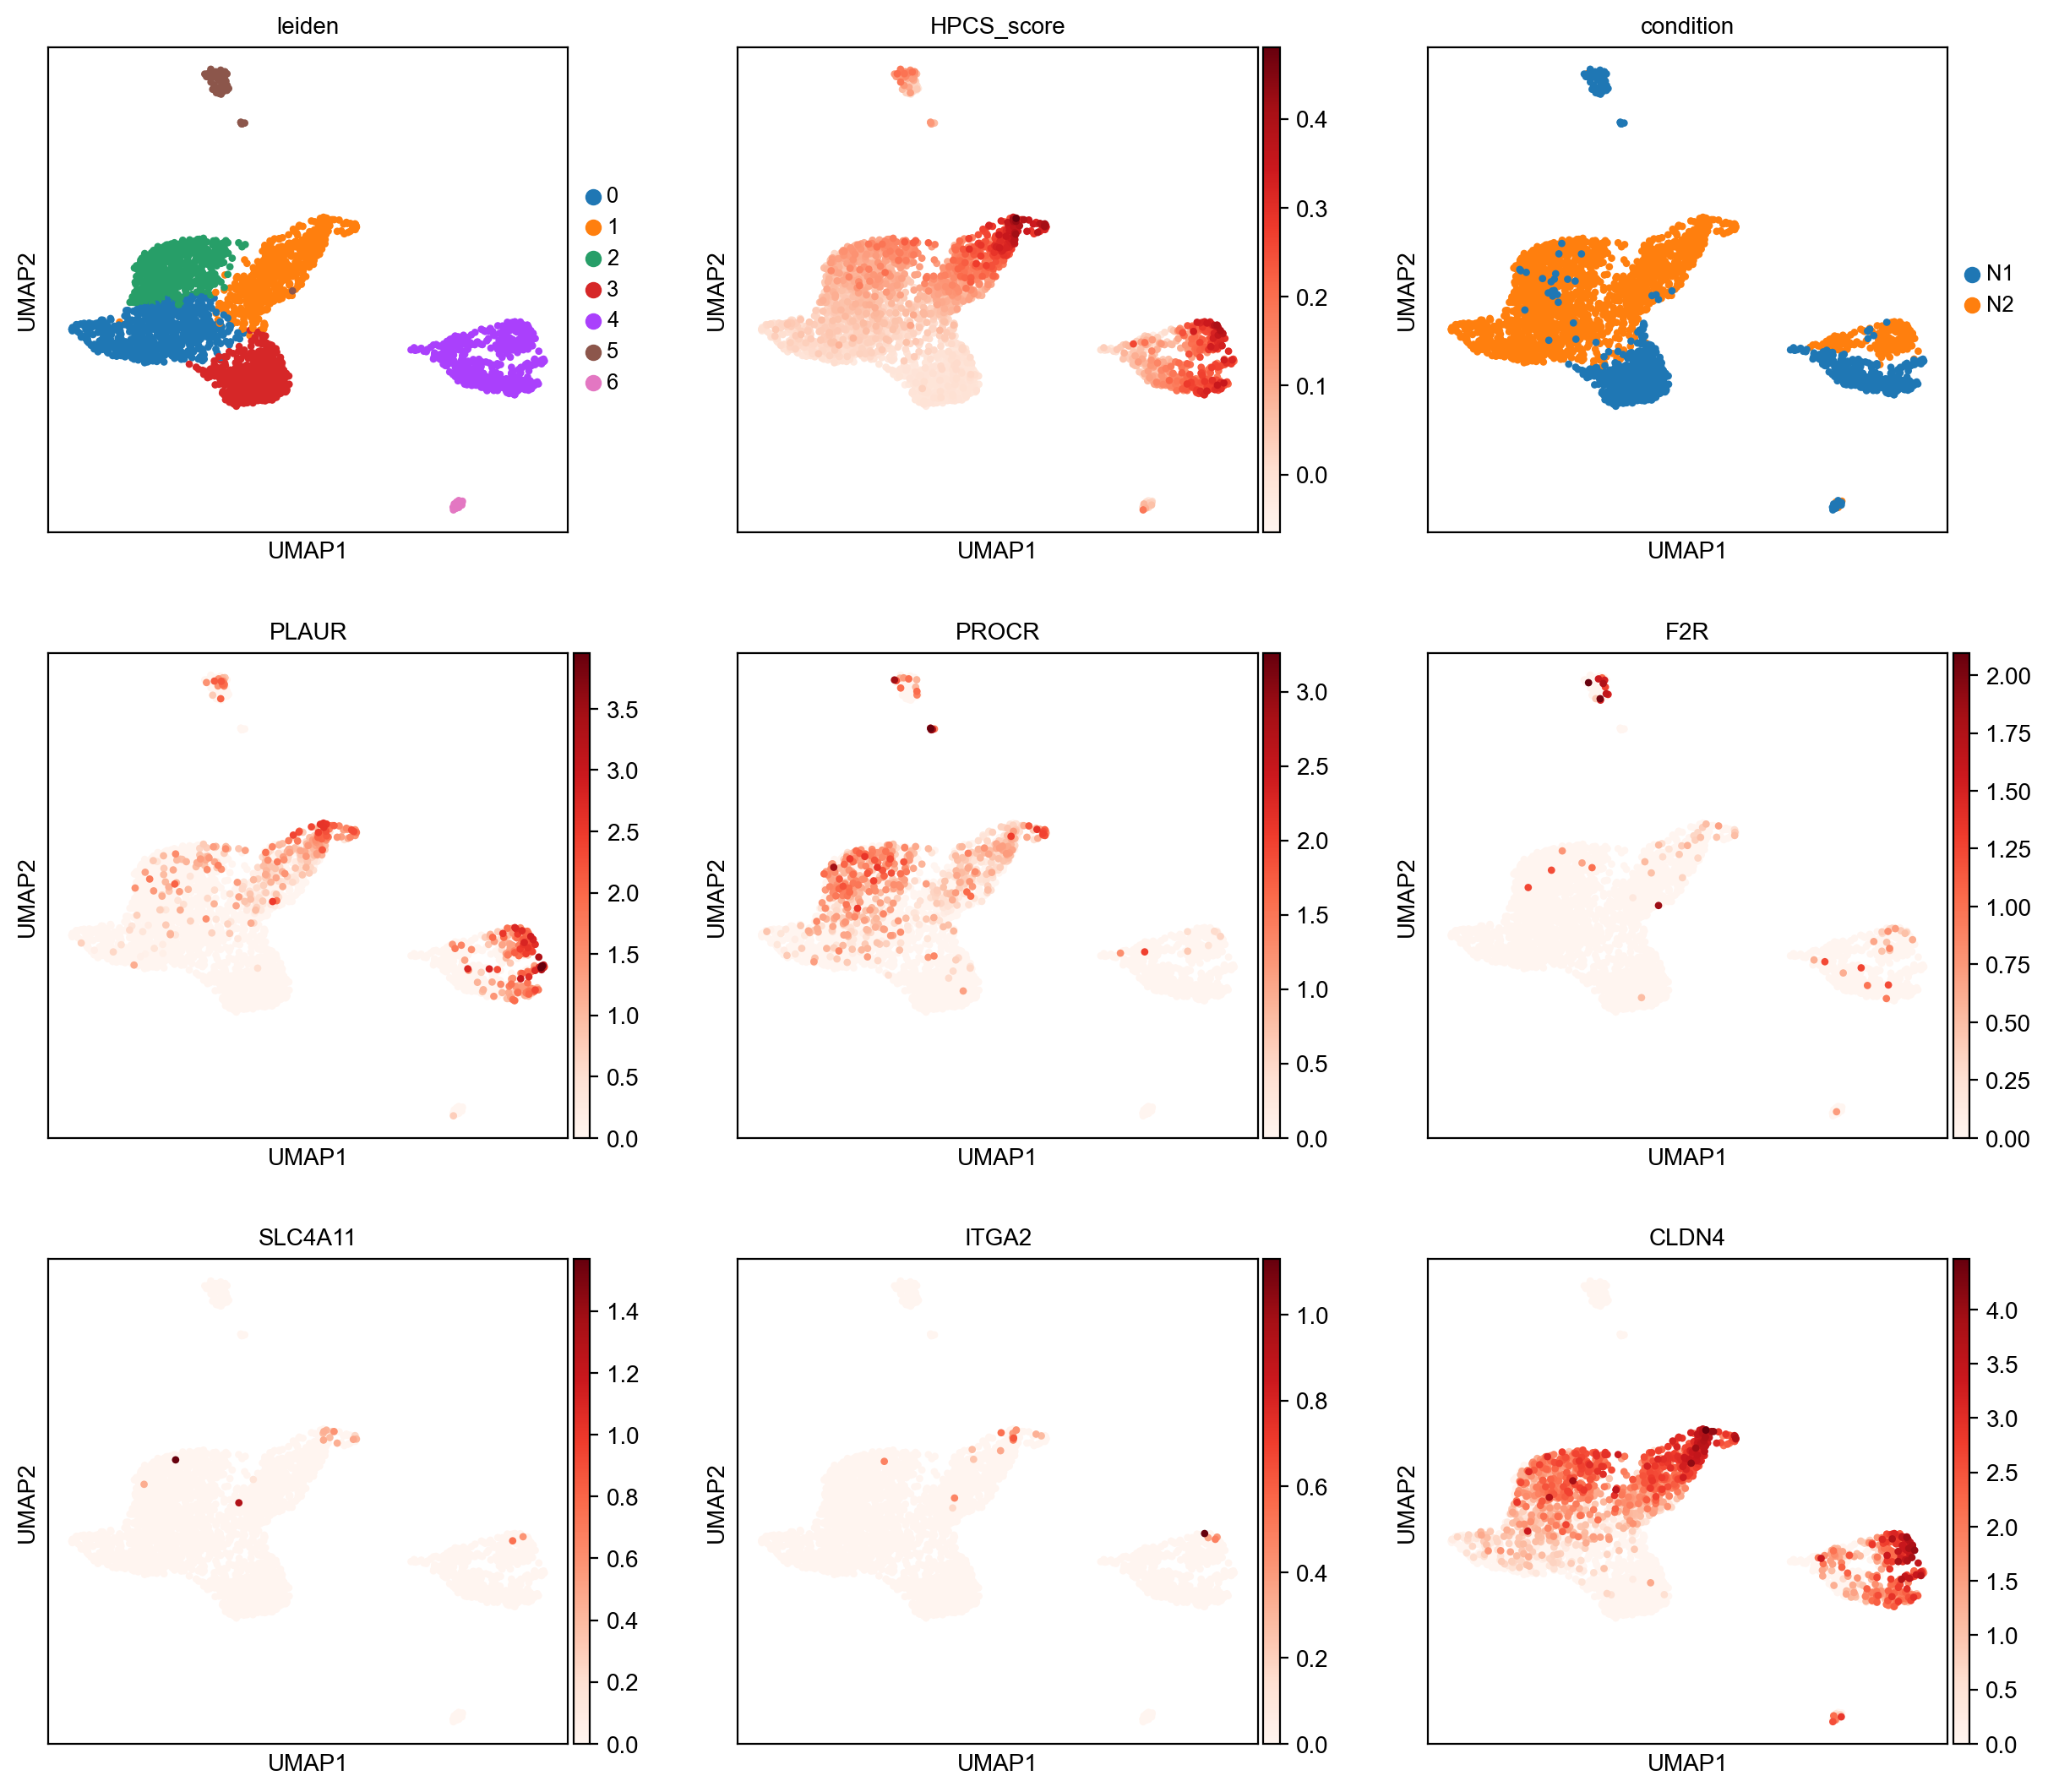

In [7]:
import scanpy as sc
writeDir = "write/"
fileName = "GSE207938_ProgressionCohort_Norm"
resultsFile = writeDir + fileName + '.h5ad' 
adata = sc.read_h5ad(resultsFile)
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.pl.umap(adata, color=["leiden","HPCS_score","condition","PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"],ncols=3, cmap="Reds")


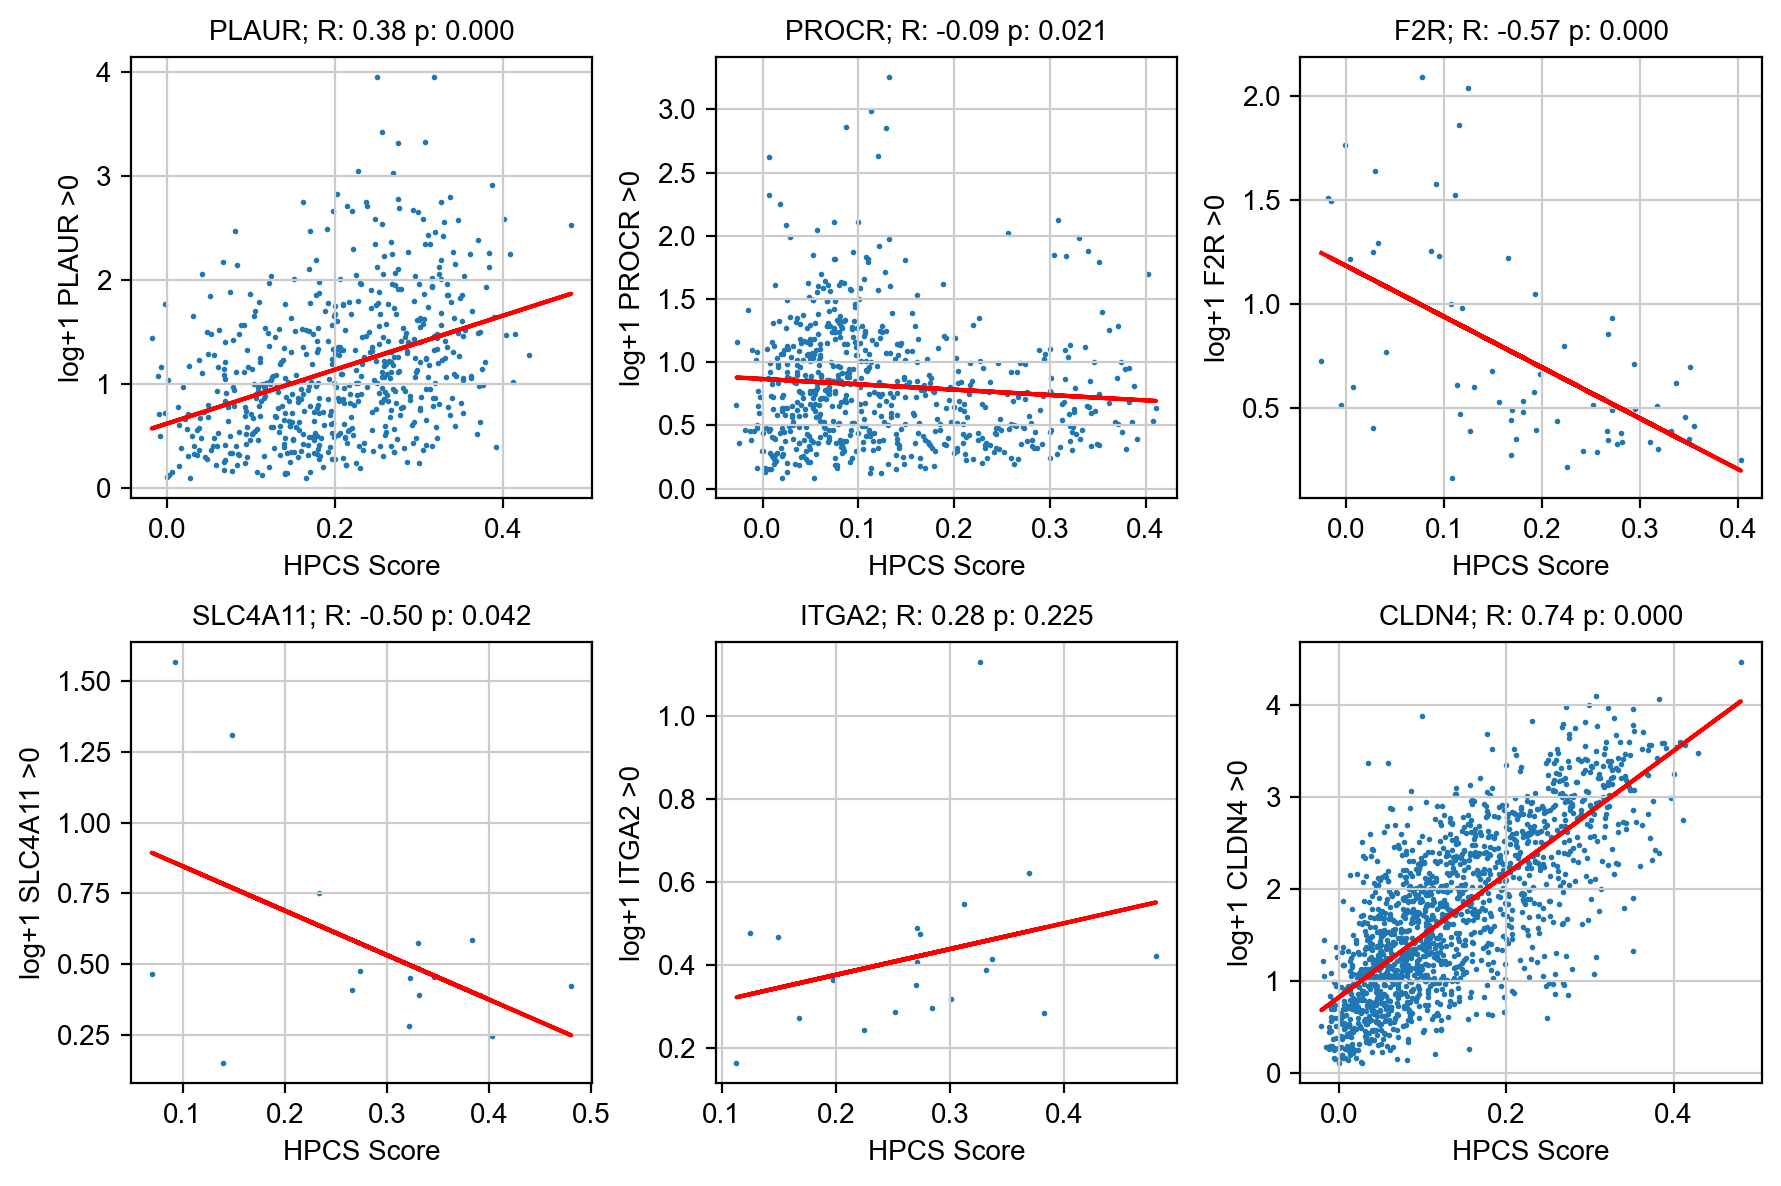

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import linregress

adatar = adata.raw.to_adata()

def plotExpvScore(gene, ax):
    geneExpr = np.array(adatar[:,adatar.var_names==gene].X.todense().flatten())[0]
    
    x = adata.obs.HPCS_score.values[geneExpr>0]
    y = geneExpr[geneExpr>0]
    
    # Fit linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #print(slope, intercept, r_value, p_value, std_err)
    
    # Calculate confidence interval
    confidence_interval = 1.96 * std_err  # 95% confidence interval
    
    # Create scatter plot
    ax.scatter(x, y, label="Data points", s=1)
    
    # Plot regression line
    ax.plot(x, slope * x + intercept, color='red', label="Regression line")
    
    ## Plot confidence interval
    #ax.fill_between(x, slope * x + intercept - confidence_interval, slope * x + intercept + confidence_interval, color='blue', alpha=0.3, label="Confidence interval")
    
    # Add labels and title
    ax.set_title(f"{gene}; R: {r_value:.2f} p: {p_value:.3f}")
    ax.set_xlabel("HPCS Score")
    ax.set_ylabel(f"log+1 {gene} >0")

    return(r_value)

genes = ["PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"]
rvals = np.zeros(len(genes))
fig, axs = plt.subplots(2,3, figsize=(9,6))

for i,ax in enumerate(axs.flatten()):
    rvals[i] = plotExpvScore(genes[i], ax)

fig.tight_layout()

pd.DataFrame(rvals, index=genes, columns=[fileName]).to_csv(f"{writeDir}/hpcsCorr/{fileName}_GeneRs.csv")